## Introduction :-

- The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate

## Objective :-

- To Explore and mine the inference from the dataset using salary as the target variable.

### Lets Get Started

#### Importing the necessary Libraries

In [1]:
## Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

#### Loading the DataSet and viewing it

In [2]:
## Loading the dataset
data = pd.read_excel(r"C:\Users\lenovo\Desktop\aspiring_minds_employability_outcomes_2015.xlsx")

## Viewing the DataSet
data.head()


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### Getting additional information about the DataSet

In [3]:
## checking the dimensions of dataset
data.shape

(3998, 39)

In [4]:
## Checking for columns Name of DataSet
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### There is an unnamed column and we cannot use this for data analysis. So we need to drop that column.

In [5]:
## Making a new dataframe because if we have same name and implement this kernel twice,it will drop the 0th column everytime
dataset = data.iloc[:,1:]
print(f'Rows : {dataset.shape[0]}\nColumns:{dataset.shape[1]}')
dataset.info()

Rows : 3998
Columns:38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   

### Dataset consists of
* 27 Numerical columns
* 9 catogorical columns
* 2 datetime

In [6]:
## Checking the Data again after dropping column
dataset.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### Checking the description of the DataSet

In [7]:
## Checking the description and rounding up the values
np.round(dataset.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,2012.0,502.0,502.0,513.0,1.0,353.0,95.0,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,32.0,105.0,87.0,122.0,0.0,205.0,158.0,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,0.0,180.0,195.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,2012.0,425.0,445.0,430.0,0.0,295.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,2013.0,500.0,505.0,515.0,1.0,415.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,2014.0,570.0,565.0,595.0,1.0,495.0,233.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,2017.0,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


## Data Cleaning

In [8]:
## Finding the anomolies in data
for i in dataset.columns:
    print('*'*20,i,'*'*20)
    print(dataset[i].unique())

******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]
******************** Salary ********************
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   5500

### Observations of the columns(regarding cleaning and missing values):
* 1.We can see the DOJ,DOL,DOB are given in timestamp format
* 2.Job city column contains -1 values which are NaN equivalents.
* 3.10 board column contain 0 value which is missing value
* 4.12 board column contain 0 value which is missing value
* 5.college state column contain 'union teritory' which is not a specific state
* 6.Graduation year column contain 0 which is a missing value
* 7.Domain column contain -1 which is a missing value





#### We can see the DOJ and DOL are given in timestamp format. Converting timestamp into date using datetime module.

#### In DOL column,We can see the value '***present***' . We will convert this into the present date for our analysis

In [9]:
import datetime as dt
dataset["DOJ"]=pd.to_datetime(dataset["DOJ"]).dt.date
dataset["DOL"].replace("present",dt.datetime.today(),inplace=True)
dataset['DOL'] = pd.to_datetime(dataset['DOL']).dt.date

## Converting feature from DOJ and DOL as we are only concerned with how many years the person has worked in the organisation.
dataset['Period'] = pd.to_datetime(dataset["DOL"]).dt.year - pd.to_datetime(dataset['DOJ']).dt.year

## Converting DOB column from timestamp to year
dataset['DOB'] = pd.to_datetime(dataset['DOB']).dt.year
dataset.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
0,203097,420000,2012-06-01,2023-06-18,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,11
1,579905,500000,2013-09-01,2023-06-18,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,10
2,810601,325000,2014-06-01,2023-06-18,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,9
3,267447,1100000,2011-07-01,2023-06-18,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,12
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


#### We do not need 12th graduation and 10th graduation timestamps,we only need the age of people during graduation to know whether they have any drop years.
#### So we droped those columns and created below new columns
* 12Gradage - It indicates the age of person during 12th graduation
* Gradage - It indicates the age of person during their higher education graduation(Degree/Engineering etc)

In [10]:
## Graduation year contains 0 value,we need to impute it with mode.
dataset['GraduationYear'].replace(0,dataset.GraduationYear.mode()[0],inplace=True)
dataset['GraduationYear']=pd.to_datetime(dataset['GraduationYear'])
dataset['gyear']=dataset['GraduationYear'].dt.year

### New columns  
dataset['12GradAge']=abs(dataset['12graduation']-dataset['DOB'])
dataset['GradAge']=abs(dataset['gyear']-dataset['DOB'])

In [11]:
## No of 0's per column
(dataset==0).astype(int).sum(axis=0)

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                   350
12graduation                0
12percentage                0
12board                   359
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscienti

In [12]:
dataset.isin([-1, 'NaN']).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

## Column : 'Designation'
### Designation Column has 'get' value which is a not a desired value. We need to clean this and can be imputed with mode of the column.

In [13]:
dataset[dataset["Designation"]=="get"][['Designation','JobCity','Salary','Specialization']]

,Designation,JobCity,Salary,Specialization
4,get,Manesar,200000,electronics and communication engineering
332,get,-1,180000,mechanical and automation
350,get,Faridabad,340000,electrical engineering
1717,get,Hyderabad,145000,mechanical engineering
1897,get,Hyderabad,175000,mechanical engineering
2140,get,Indore,600000,mechanical engineering
2318,get,Lucknow,220000,electronics and electrical engineering
2443,get,kharagpur,110000,mechanical engineering
2666,get,Hyderabad,200000,electronics and electrical engineering
2757,get,Nashik,350000,mechanical engineering


### From here,we can see that most of people whose designation is unknown are from mechanical domain(70%) and ECE(30%).
### So we can pick the mode of designation for people belonging to mechanical electrical domain and impute it with get value.

In [14]:
## For people with mechanical engineering
mech = dataset[dataset['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]

## For people with electronics and electrical engineering
eee = dataset[dataset['Specialization']==('electronics and electrical engineering')]['Designation'].mode()[0]

print(f'Mode for Mechanical:  {mech}\nMode for EEE:  {eee}')

Mode for Mechanical:  production engineer
Mode for EEE:  system engineer


### Now we will impute the 'get' of designation with modes of the respective domains

In [15]:
## For mechanical domain
dataset.loc[dataset['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get',mech,inplace=True)

## For EEE domain
dataset['Designation'].replace('get',eee,inplace=True)

## Column : 'Jobcity'
### Jobcity contains missing values(-1). We need to treat this by using mode.

In [16]:
## We do not want our data to be case sensitive in jobcity because it will effect our analysis.
## So let us replace -1 with some string and then apply title method to it.

dataset['JobCity'].replace(-1,'unknown',inplace=True)
dataset['JobCity'].apply(lambda x:x.title())

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [17]:
dataset[dataset["JobCity"]=='unknown']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,gyear,12GradAge,GradAge
15,536517,350000,2013-08-01,2023-06-18,network engineer,unknown,f,1990,69.54,icse,2008,64.43,isc,4501,2,B.Tech/B.E.,information technology,63.00,4501,0,Uttar Pradesh,1970-01-01 00:00:00.000002012,485,520,355,0.308401,355,-1,-1,-1,-1,-1,-1,1.7465,1.9048,0.6720,-0.29020,1.2528,10,1970,18,20
21,339689,200000,2012-08-01,2013-12-01,software engineer,unknown,f,1991,75.67,up,2007,74.40,up,11368,2,B.Tech/B.E.,information technology,74.01,11368,0,Uttar Pradesh,1970-01-01 00:00:00.000002012,385,555,445,0.635979,445,-1,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,1,1970,16,21
39,533417,200000,2013-01-01,2013-06-01,management trainee,unknown,m,1991,88.00,kerala state technical education,2008,89.66,kerala state hse board,867,2,B.Tech/B.E.,electronics and communication engineering,76.40,867,0,Kerala,1970-01-01 00:00:00.000002012,510,640,635,0.124502,-1,233,-1,-1,-1,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455,0,1970,17,21
77,754392,120000,2014-07-01,2023-06-18,test engineer,unknown,m,1992,76.00,state board,2009,72.00,state board,8888,2,B.Tech/B.E.,computer science & engineering,63.20,8888,0,Tamil Nadu,1970-01-01 00:00:00.000002013,510,355,340,0.123017,285,-1,-1,-1,-1,-1,-1,-0.1590,-0.2871,0.4711,0.27270,-0.4776,9,1970,17,22
79,1089852,100000,2013-08-01,2014-05-01,software developer,unknown,f,1992,86.00,state board,2009,95.00,state board,4726,2,B.Tech/B.E.,electronics and communication engineering,78.60,4726,0,Telangana,1970-01-01 00:00:00.000002013,405,545,450,0.649390,375,356,-1,-1,-1,-1,-1,0.5591,-0.4536,0.0100,-0.48790,0.6721,1,1970,17,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,385546,205000,2012-10-01,2014-02-01,production engineer,unknown,m,1991,84.80,cbse,2008,81.40,cbse,100,2,B.Tech/B.E.,electronics and communication engineering,83.50,100,0,Haryana,1970-01-01 00:00:00.000002012,485,585,605,0.376060,-1,300,-1,-1,-1,233,-1,0.1623,0.0328,-0.3440,-1.05410,0.5024,2,1970,17,21
3942,1067015,280000,2013-07-01,2023-06-18,software engineer,unknown,m,1990,78.00,state board,2009,91.00,state board,11183,2,B.Tech/B.E.,electronics and communication engineering,64.62,11183,1,Telangana,1970-01-01 00:00:00.000002013,405,425,380,-1.000000,405,-1,346,-1,-1,-1,-1,1.7081,-0.9531,0.1637,-1.62890,-0.8608,10,1970,19,20
3954,531726,310000,2014-04-01,2015-04-01,business intelligence analyst,unknown,f,1992,88.40,ssc,2009,92.90,board of intermediate,492,2,B.Tech/B.E.,electronics and communication engineering,69.37,492,1,Telangana,1970-01-01 00:00:00.000002013,440,440,545,0.694479,325,366,-1,-1,-1,393,-1,0.8192,0.6568,0.9623,-0.29020,0.0679,1,1970,17,22
3973,755067,335000,2013-08-01,2023-06-18,programmer analyst,unknown,m,1990,66.85,state board,2008,59.11,state board,1906,2,B.Tech/B.E.,information technology,82.10,1906,1,West Bengal,1970-01-01 00:00:00.000002013,520,660,620,0.793581,495,-1,-1,-1,-1,-1,-1,0.2718,-0.1206,-1.2196,-0.36120,-0.6692,10,1970,18,20


In [18]:
dataset[dataset["JobCity"]=="unknown"][["Designation","12GradAge","GradAge","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]].mode()

,Designation,12GradAge,GradAge,JobCity,Gender,10percentage,10board,12percentage,12board,Degree,Specialization,CollegeState,Specialization
0,software engineer,18.0,21.0,unknown,m,76.0,cbse,64.0,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,electronics and communication engineering
1,NaN,NaN,NaN,NaN,NaN,78.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## Cleaning the column which have similar meaning 
dataset["JobCity"].replace("Bangalore","Bengaluru",inplace=True)
dataset["JobCity"].replace("Banaglore","Bengaluru",inplace=True)
dataset["JobCity"].replace("Chennai, Bangalore","Bengaluru",inplace=True)
dataset["JobCity"].replace(" Bangalore","Bengaluru",inplace=True)
dataset["JobCity"].replace("Bangalore ","Bengaluru",inplace=True)
dataset["JobCity"].replace("Banglore","Bengaluru",inplace=True)
dataset["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
dataset["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
dataset["JobCity"].replace("Bangalore ","Bengaluru",inplace=True)
dataset["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
dataset["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
dataset["JobCity"].replace("Hyderabad ","Hyderabad",inplace=True)
dataset["JobCity"].replace("Hyderabad(Bhadurpally)","Hyderabad",inplace=True)
dataset["JobCity"].replace("Bhubaneswar ","Bhubaneswar",inplace=True)
dataset["JobCity"].replace("Delhi/Ncr","Delhi",inplace=True)
dataset["JobCity"].replace("Nagpur ","Nagpur",inplace=True)
dataset["JobCity"].replace("Pune ","Pune",inplace=True)
dataset["JobCity"].replace("Trivandrum ","Trivandrum",inplace=True)
dataset["JobCity"].replace("Thiruvananthapuram","Trivandrum",inplace=True)

In [20]:
### Now,we will find list of modes of other columns when they have the above found frequent value in their respective column.

best_mode = []
best_mode.append(dataset[dataset["Designation"]=="software engineer"]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["Gender"]=="m"]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["10percentage"]==76]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["10board"]=="cbse"]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["12percentage"]==64]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["12board"]=="cbse"]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["collegeGPA"]==70]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["Salary"]==200000]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["Degree"].str.startswith("B.Tech/")]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["Specialization"].str.startswith("electronics and communication eng")]["JobCity"].mode().to_list()[0])
best_mode.append(dataset[dataset["CollegeState"].str.startswith("Uttar Pradesh")]["JobCity"].mode().to_list()[0])
best_mode

['Bengaluru',
 'Bengaluru',
 'unknown',
 'Noida',
 'unknown',
 'Noida',
 'Bengaluru',
 'unknown',
 'Bengaluru',
 'Bengaluru',
 'Noida']

In [21]:
### We can see mode from the best_mode list is 'Bangalore'
dataset["JobCity"].replace("unknown",'Bengaluru',inplace=True)

## Column: '10-board'
## This column has missing values in the form of '0'.Let us handle these using same proceedure(mode).

In [22]:
dataset[dataset["10board"]==0][["Designation","12GradAge","GradAge","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]].mode()

,Designation,12GradAge,GradAge,JobCity,Gender,10percentage,10board,12percentage,12board,Degree,Specialization,CollegeState,Specialization
0,software engineer,18.0,19.0,Bengaluru,m,75.0,0,65.0,0,B.Tech/B.E.,computer engineering,Tamil Nadu,computer engineering
1,system engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
best_value2=[]
best_value2.append(dataset[dataset["Designation"]=="software engineer"]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["Gender"]=="m"]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["10percentage"]==75]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["JobCity"]=="Bengaluru"]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["12percentage"]==65]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["collegeGPA"]==65]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["Salary"]==400000]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["Degree"].str.startswith("B.Tech/")]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["Specialization"].str.startswith("computer eng")]["10board"].mode().to_list()[0])
best_value2.append(dataset[dataset["CollegeState"].str.startswith("Tamil Nadu")]["10board"].mode().to_list()[0])
best_value2

['cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'cbse',
 'state board']

In [24]:
## Replacing with the mode of the best_value list
dataset['10board'].replace(0,'cbse',inplace=True)

## Column: '12-board'
## This column has missing values in the form of '0'.Let us handle these using same proceedure(mode).

In [25]:
## From what i found from above,we can be sure that 12 board missing value can be replaced with 'cbse' 
## as most of the people do 12th also from the same board.(general observation,can also be proved)
dataset['12board'].replace(0,'cbse',inplace=True)

## Column : 'Domain'
### This column has missing values in form of -1

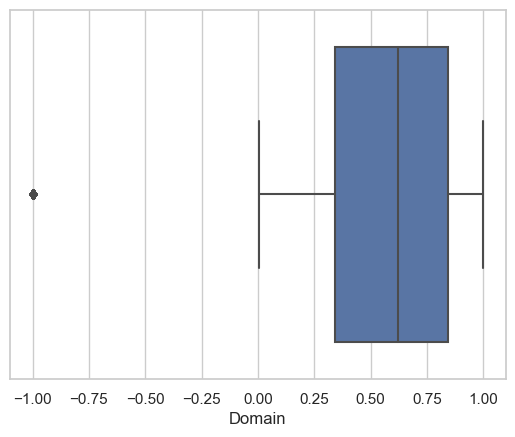

In [26]:
sns.boxplot(dataset['Domain'])
plt.show()

In [27]:
## As we can see outlier,it is better to use median to replace the missing values.
dataset['Domain'].replace(-1,dataset['Domain'].median(),inplace=True)
dataset.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,gyear,12GradAge,GradAge
0,203097,420000,2012-06-01,2023-06-18,senior quality engineer,Bengaluru,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01 00:00:00.000002011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,11,1970,17,20
1,579905,500000,2013-09-01,2023-06-18,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01 00:00:00.000002012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,10,1970,18,19
2,810601,325000,2014-06-01,2023-06-18,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01 00:00:00.000002014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,9,1970,18,22
3,267447,1100000,2011-07-01,2023-06-18,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,12,1970,18,19
4,343523,200000,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01 00:00:00.000002012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21


## Column - 12board
### Replacing the redundant values of the 12board column with 'state','cbse','icse'.

In [28]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','intermideate','up bord','andhra pradesh state board','gujarat board']

In [29]:
## Replacing the redundant values of the 12board column with 'state','cbse','icse' 
for i in replace_list_state:
    dataset['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    dataset['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    dataset['12board'].replace(i,'icse',inplace=True)

dataset['12board'].unique()

array(['state', 'cbse', 'icse'], dtype=object)

In [30]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [31]:
dataset['Specialization'] = dataset['Specialization'].map(specialization_map)
dataset['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

## Uni-variate and Bi-variate Analysis 

In [32]:
dataset.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)

In [33]:
dataset.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Period', 'gyear', '12GradAge', 'GradAge'],
      dtype='object')

In [34]:
### Salary less than 50000 people might have entered their montly income rather than yearly
dataset.loc[dataset['Salary']<=50000,'Salary']*=12
lst = ['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']
for i in lst:
    dataset[i].replace(-1,0,inplace=True)

### Data Visualisation

<Figure size 1500x500 with 0 Axes>

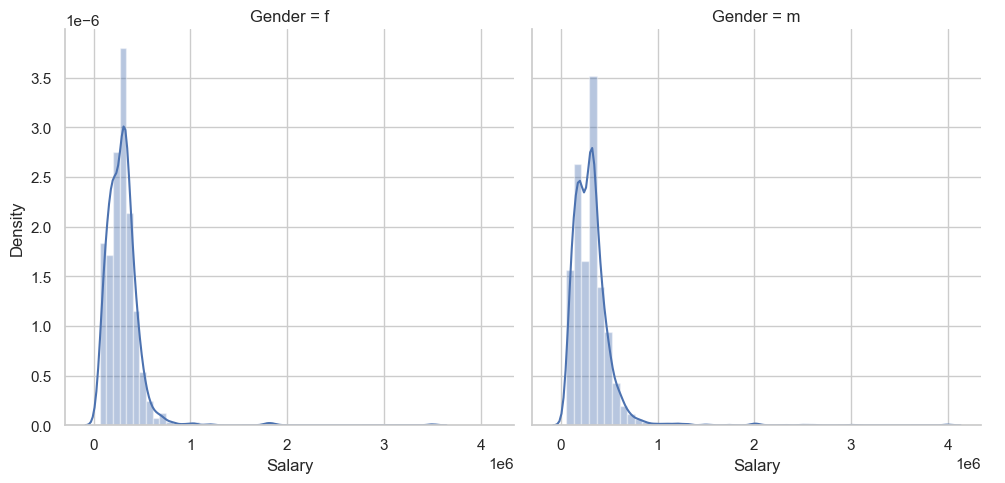

<function print>

In [35]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(dataset, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()
print

* We can observe that the salary data is right skewed.
* We can also see that the distributions are quite similar for male and female in the range below 10lakhs.

m    3041
f     957
Name: Gender, dtype: int64


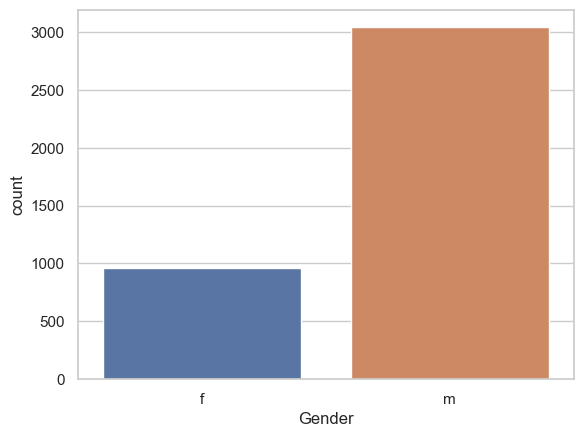

In [36]:
sns.countplot(dataset['Gender'])
print(dataset['Gender'].value_counts())

* The ratio of m/f is 3.19 indicates there are 3 times more men than women employed

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

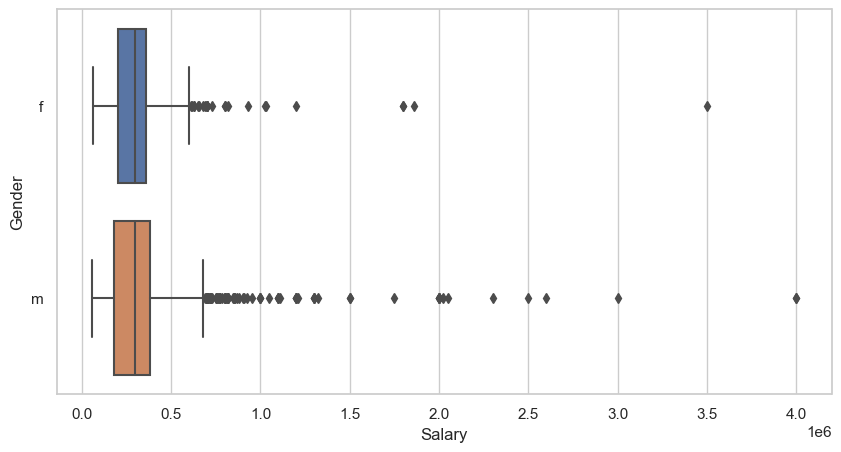

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Gender',data=dataset)

* It is noted that there are many outliers in the salary data
* There is not much difference between median salary for both genders.
* We can also observe male have more outliers indicating they are more people getting higher pays in male than female category

Text(0.5, 0.98, 'Salary levels by specialization')

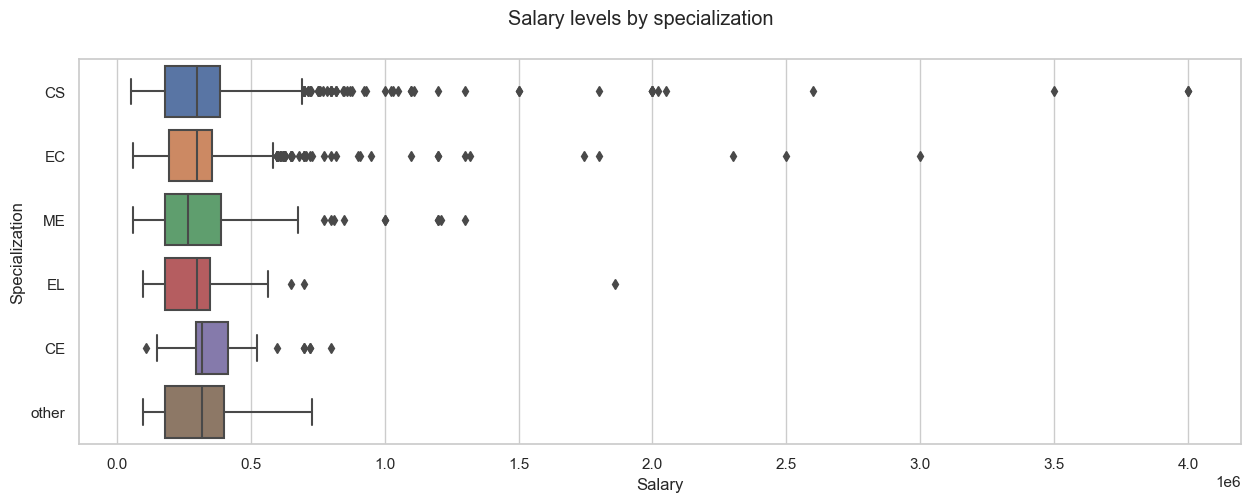

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',y='Specialization',data=dataset)
plt.suptitle('Salary levels by specialization')

* Median salary of people from all specializations are nearly similar.
* We can see there are more people getting higher pays who have specialization in CS/EC compared to others.

In [39]:
## Designation
popular_Designation = dataset['Designation'].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer', 'java developer', 'test engineer', 'web developer', 'application developer', 'assistant manager', 'network engineer', 'data analyst', 'business analyst', 'engineer', 'associate software engineer']


In [40]:
### Unique professions
top_Designations = dataset[dataset['Designation'].isin(popular_Designation)]
print(f"Unique professions : {len(dataset['Designation'].unique())}")
top_Designations.head()

Unique professions : 418


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,gyear,12GradAge,GradAge
1,579905,500000,2013-09-01,2023-06-18,assistant manager,Indore,m,1989,85.40,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,Madhya Pradesh,1970-01-01 00:00:00.000002012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,10,1970,18,19
2,810601,325000,2014-06-01,2023-06-18,systems engineer,Chennai,f,1992,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,Uttar Pradesh,1970-01-01 00:00:00.000002014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,9,1970,18,22
3,267447,1100000,2011-07-01,2023-06-18,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,12,1970,18,19
4,343523,200000,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.00,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,Uttar Pradesh,1970-01-01 00:00:00.000002012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21
5,1027655,300000,2014-06-01,2023-06-18,system engineer,Hyderabad,m,1992,89.92,state board,2010,87.0,state,2,B.Tech/B.E.,EC,76.32,Karnataka,1970-01-01 00:00:00.000002014,560,555,620,0.622643,645,0,407,0,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,9,1970,18,22


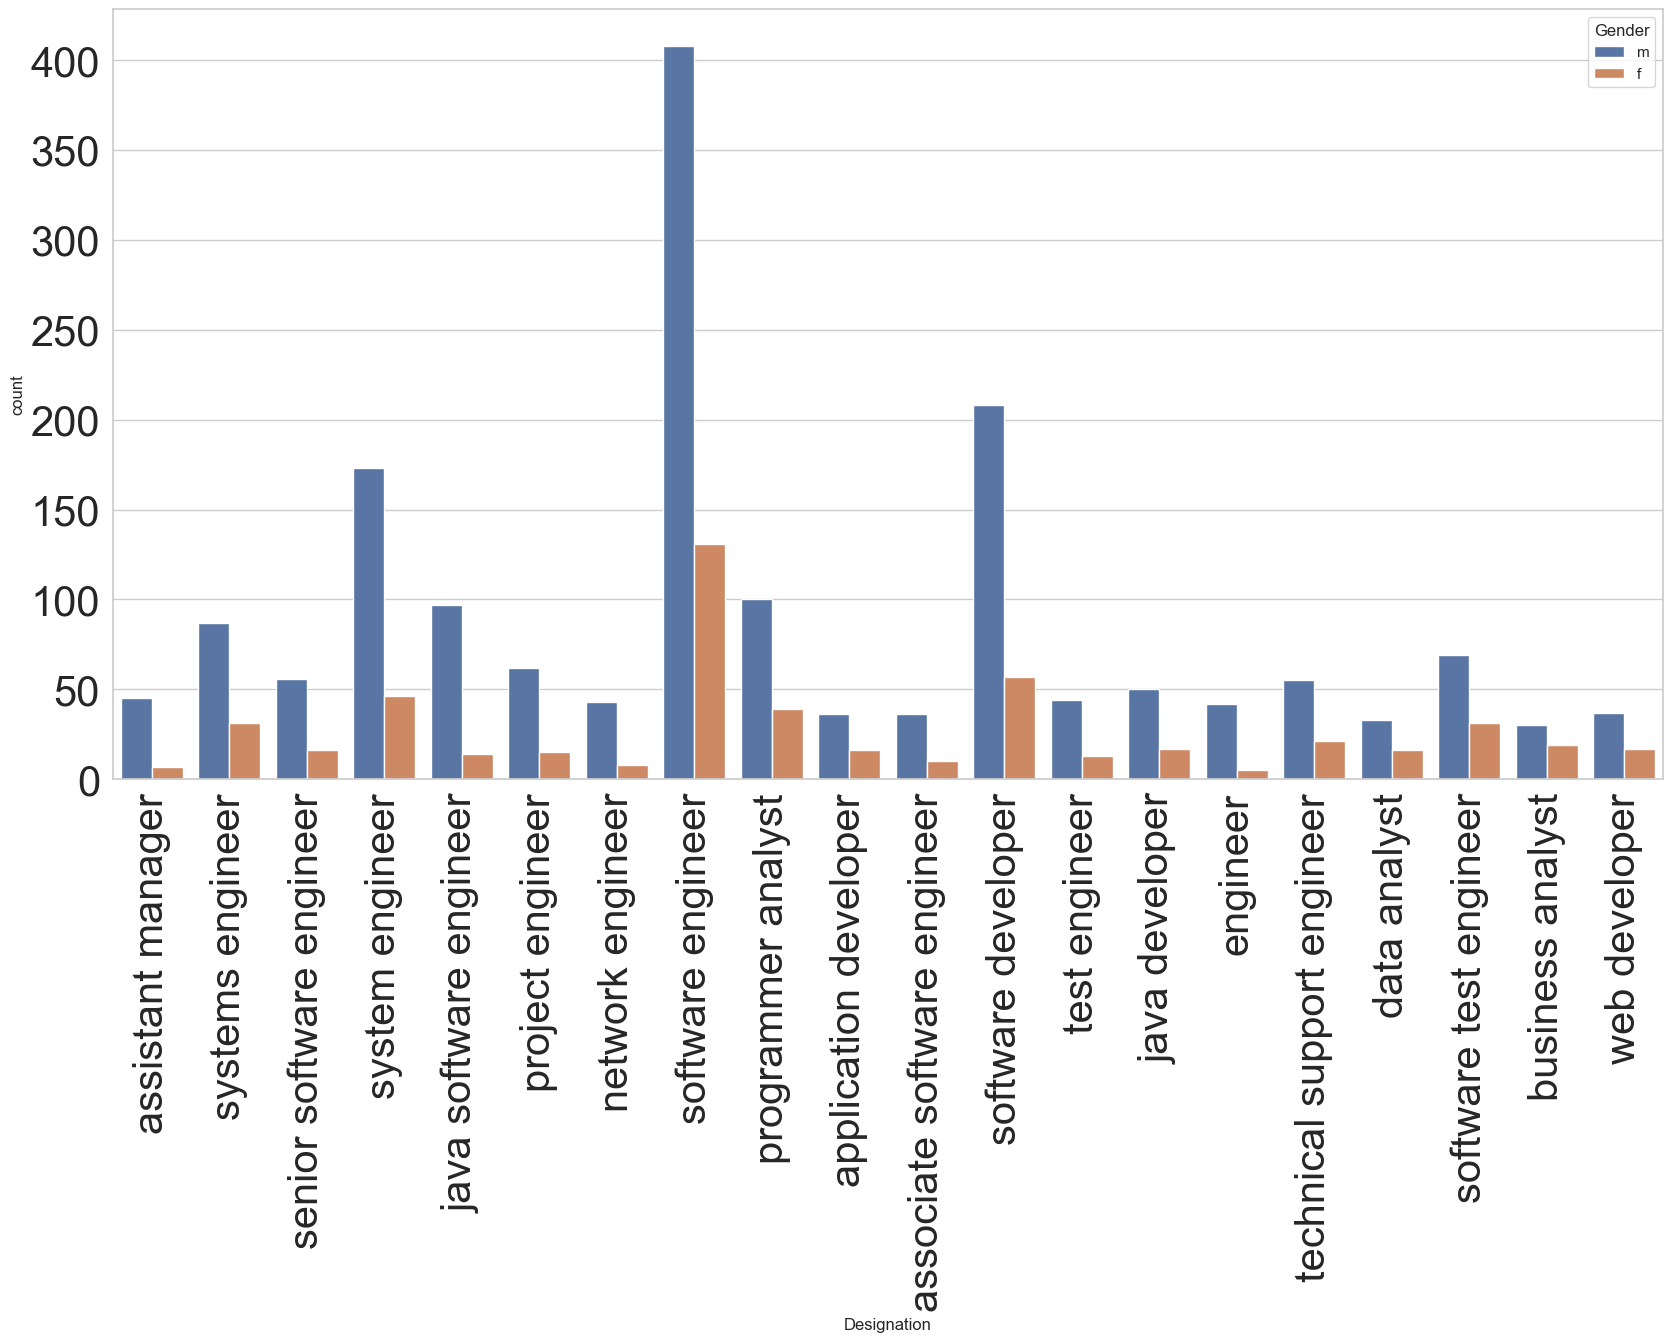

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* All the general professions are more dominated by the males as we can there is considerable difference of frequency for every role.
* Here we took the most common roles taken by the amcat aspirants which are mostly 'IT Roles'.
* from the plot,we can understand the reason for most 'IT roles' might be because of Specialization.

<AxesSubplot:xlabel='Specialization', ylabel='count'>

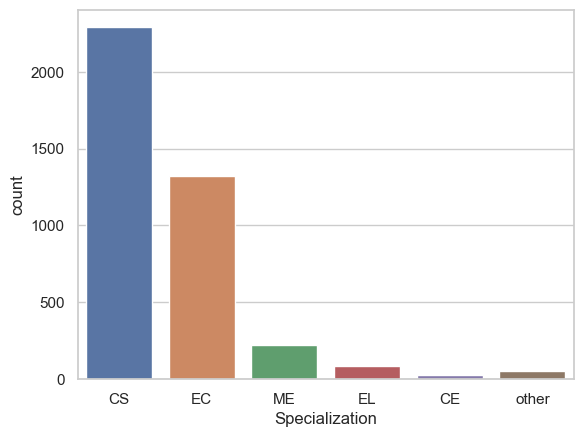

In [42]:
sns.countplot(dataset['Specialization'])

<AxesSubplot:xlabel='Degree', ylabel='count'>

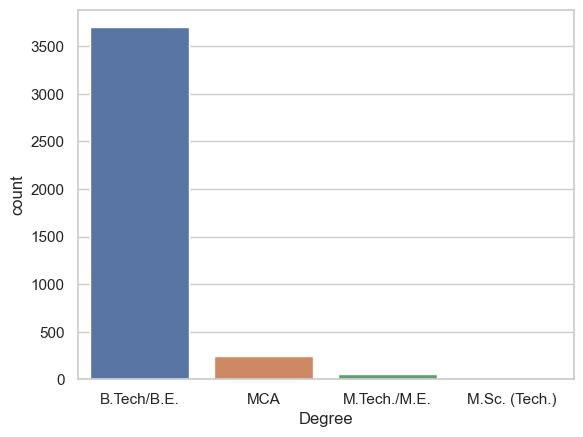

In [43]:
sns.countplot(dataset['Degree'])

* Most of the Amcat aspirants are from Btech domain 

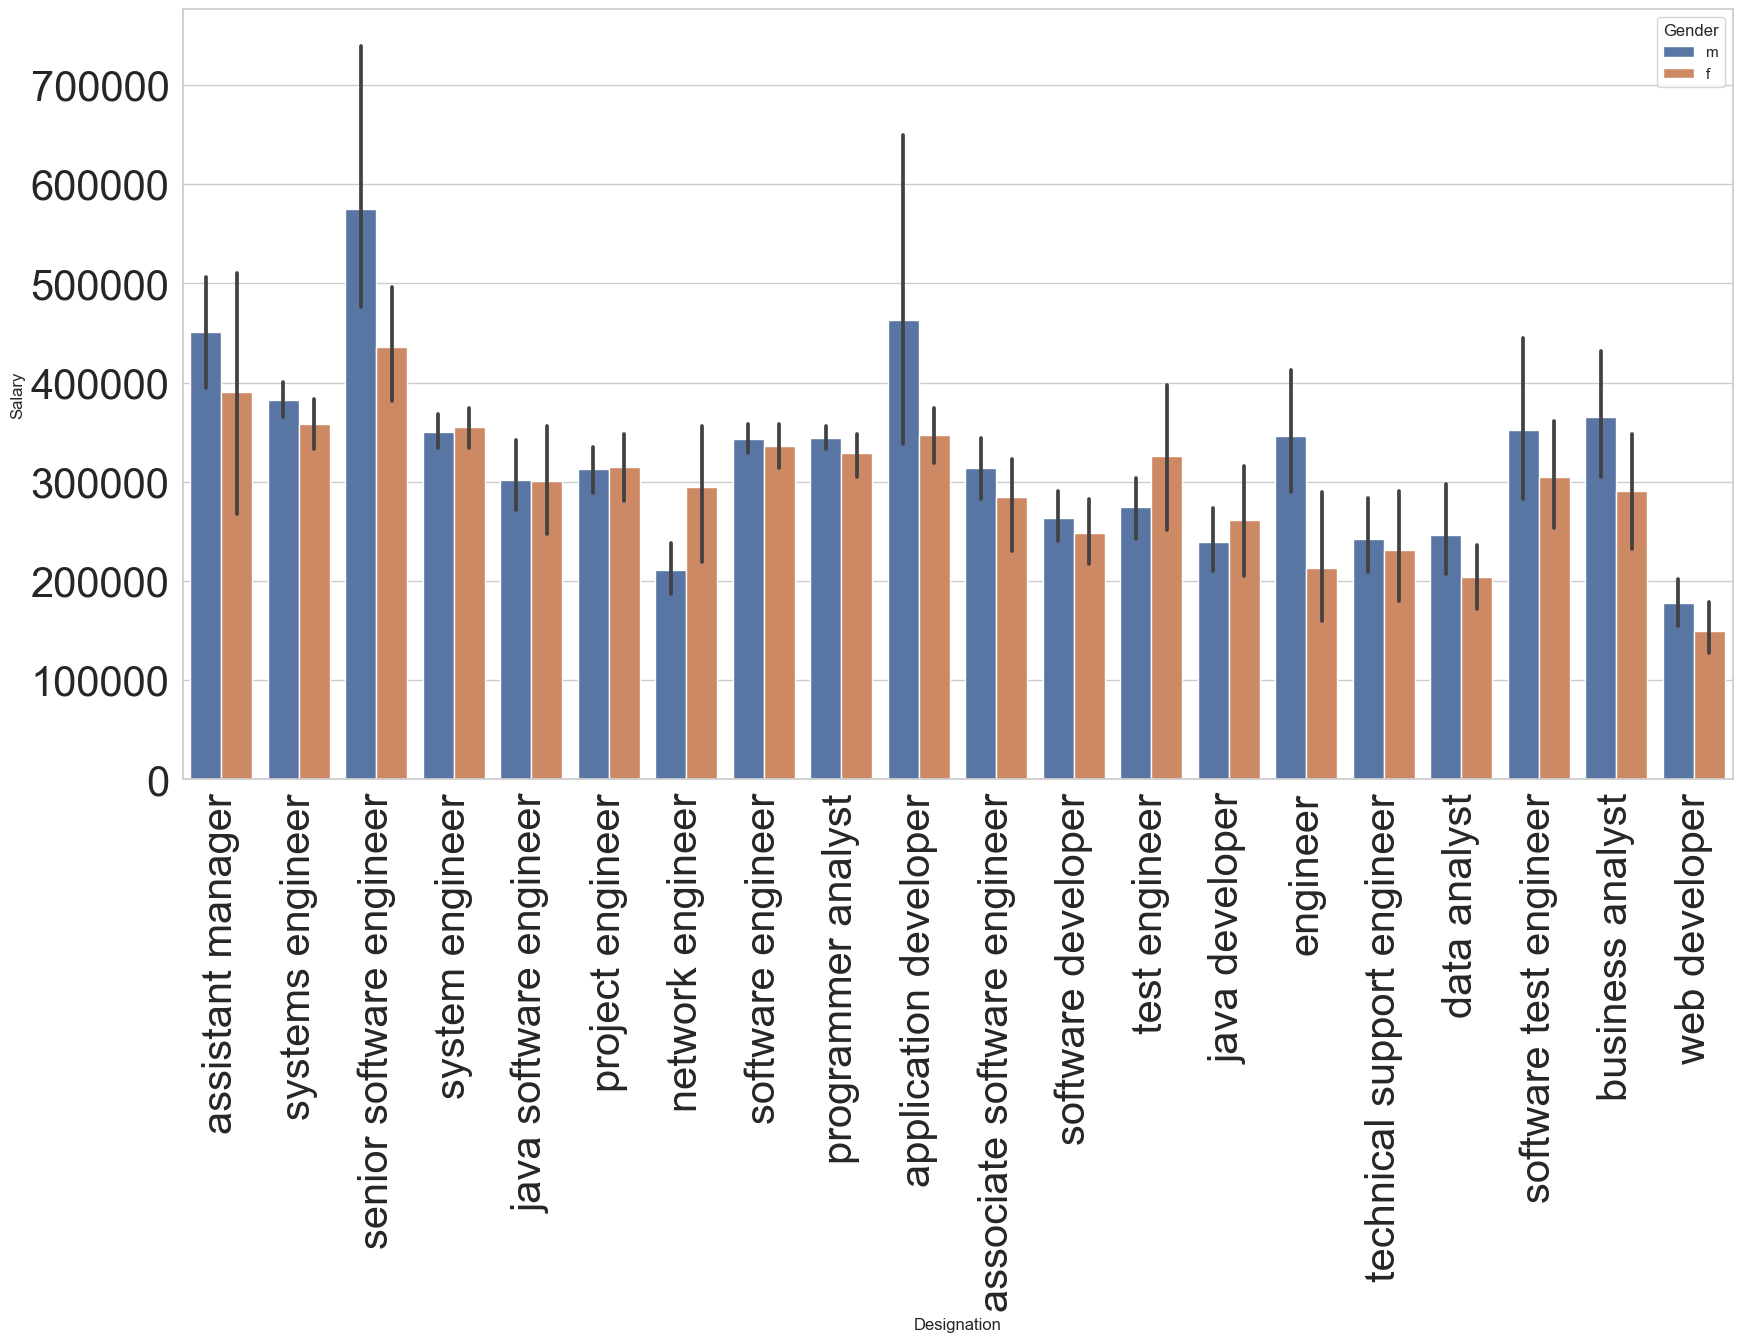

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* mean salary of top most frequent roles is nearly independent of gender.
* there is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
* it might be due to experience,specialization etc.

In [45]:
## High paying designations and their relation with respect to gender
high = list(dataset.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = dataset[dataset['Designation'].isin(high)]
high_pay.head()


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,gyear,12GradAge,GradAge
3,267447,1100000,2011-07-01,2023-06-18,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,CS,74.64,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.4078,-0.9194,12,1970,18,19
6,947847,300000,2014-08-01,2015-05-01,java software engineer,Bengaluru,m,1993,86.08,state board,2010,67.50,state,2,B.Tech/B.E.,CS,72.98,Karnataka,1970-01-01 00:00:00.000002014,590,435,380,0.356536,405,0,346,0,0,0,0,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1,1970,17,23
14,1279958,300000,2013-07-01,2023-06-18,java software engineer,Bengaluru,m,1992,81.20,state board,2008,79.90,state,2,B.Tech/B.E.,EC,67.67,Uttar Pradesh,1970-01-01 00:00:00.000002013,395,565,645,0.622643,495,0,376,0,0,0,0,0.7027,0.7119,0.0100,-0.9950,0.6721,10,1970,16,22
19,466888,325000,2014-09-01,2023-06-18,software engineer,Pune,f,1990,79.00,cbse,2008,62.20,cbse,2,B.Tech/B.E.,CS,76.30,Uttar Pradesh,1970-01-01 00:00:00.000002012,485,445,435,0.864685,525,0,0,0,0,0,0,0.8192,0.2668,-0.2714,-0.4078,-0.1295,9,1970,18,20
20,140069,320000,2010-11-01,2012-09-01,software engineer,Bengaluru,f,1988,91.20,karnataka secondary school of examination,2006,84.63,state,2,B.Tech/B.E.,CS,78.15,Karnataka,1970-01-01 00:00:00.000002010,455,535,445,0.635979,445,0,0,0,0,0,0,-0.1082,0.9688,0.5269,-0.2902,0.3444,2,1970,18,18


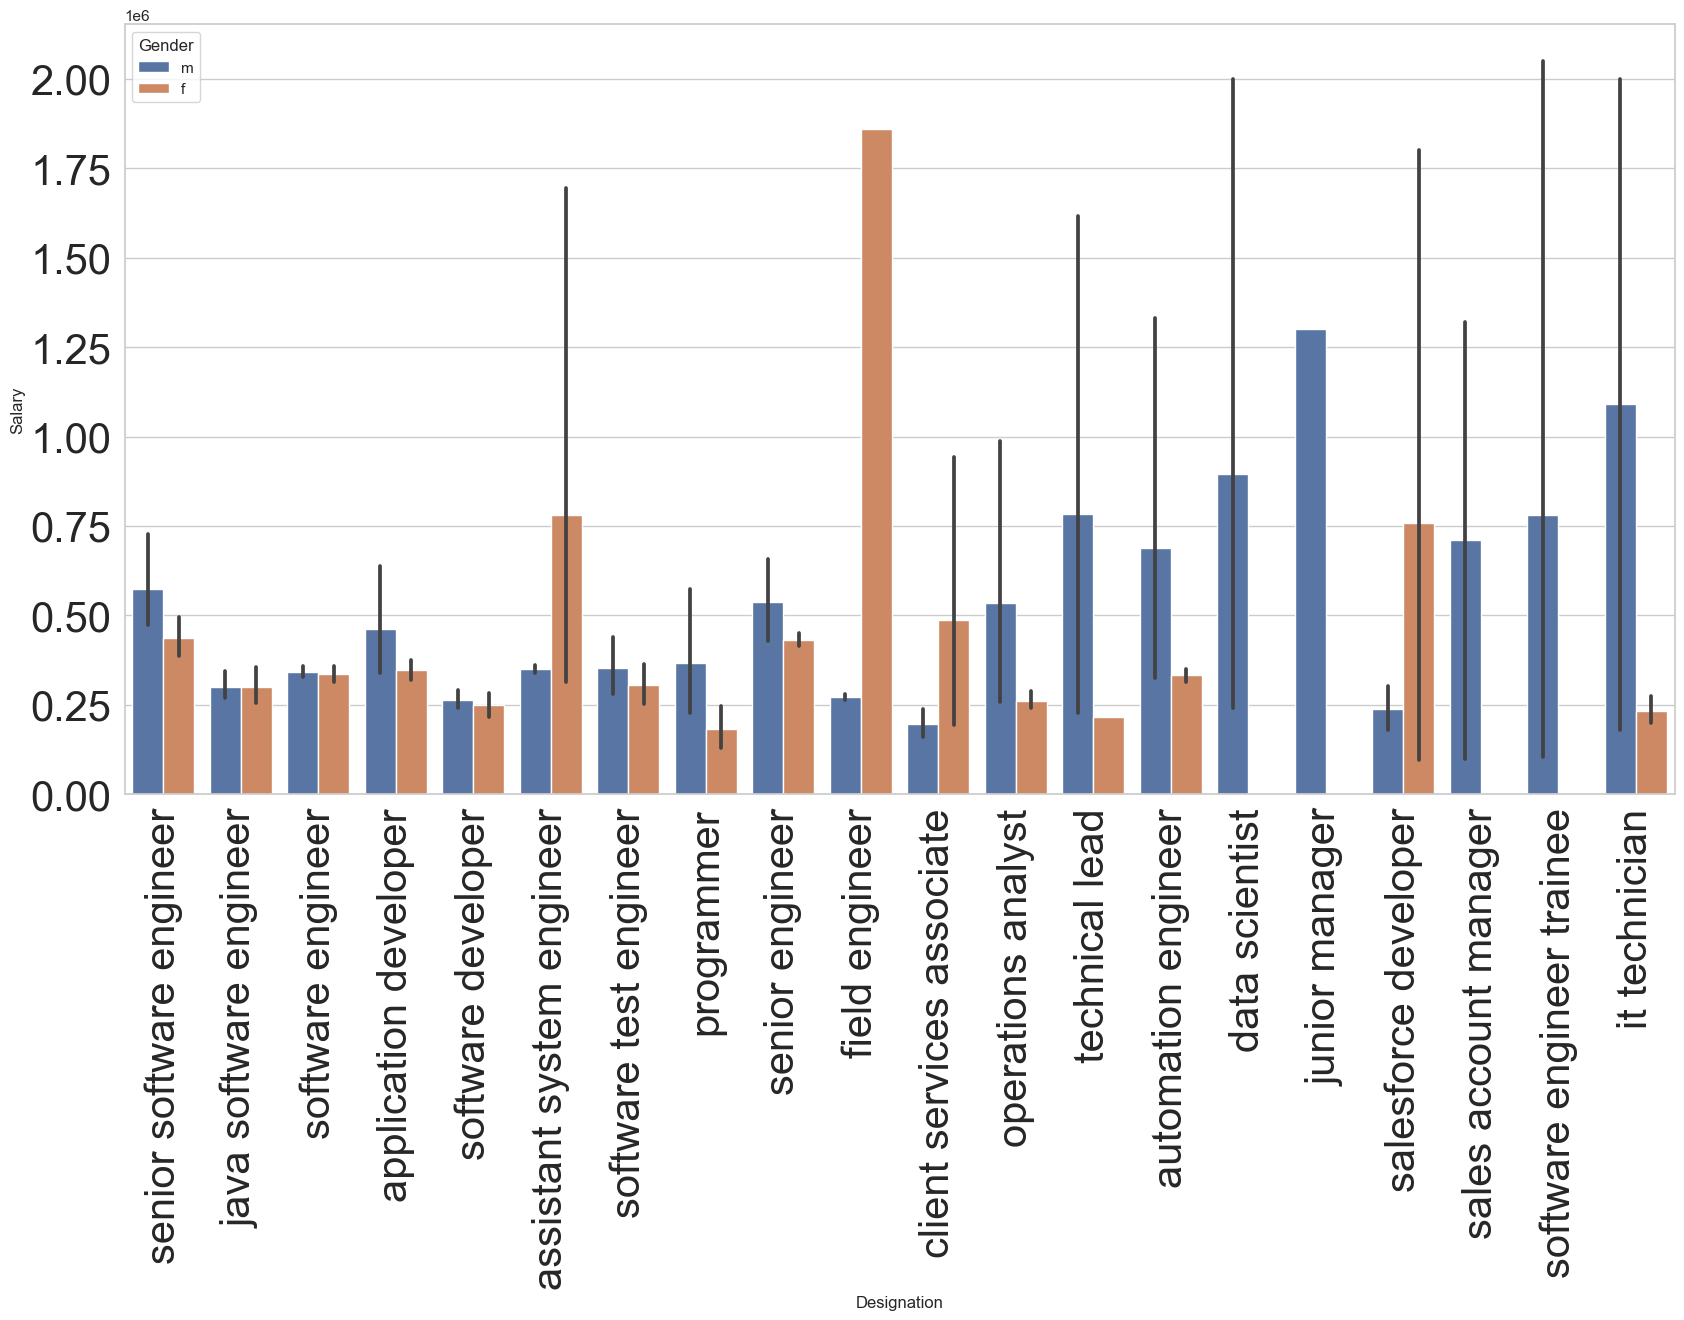

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=high_pay)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()


* Most of the high paying jobs are from IT domain.
* In 45% of top paying roles,men are generally paid higher compared to women.
* In 20% of top paying roles,women are paid higher than men
* In roles like junior manager,sales account manager,software engineer trainee there are no women working in these fields.
* Junior manager is highest paying for men and field engineer is the highest paying role for women.
* The disperancy between pay based on gender might be because of other features like experience,specialization etc.
* Software Enginner and Software developer are most frequent and highest paying jobs

<AxesSubplot:>

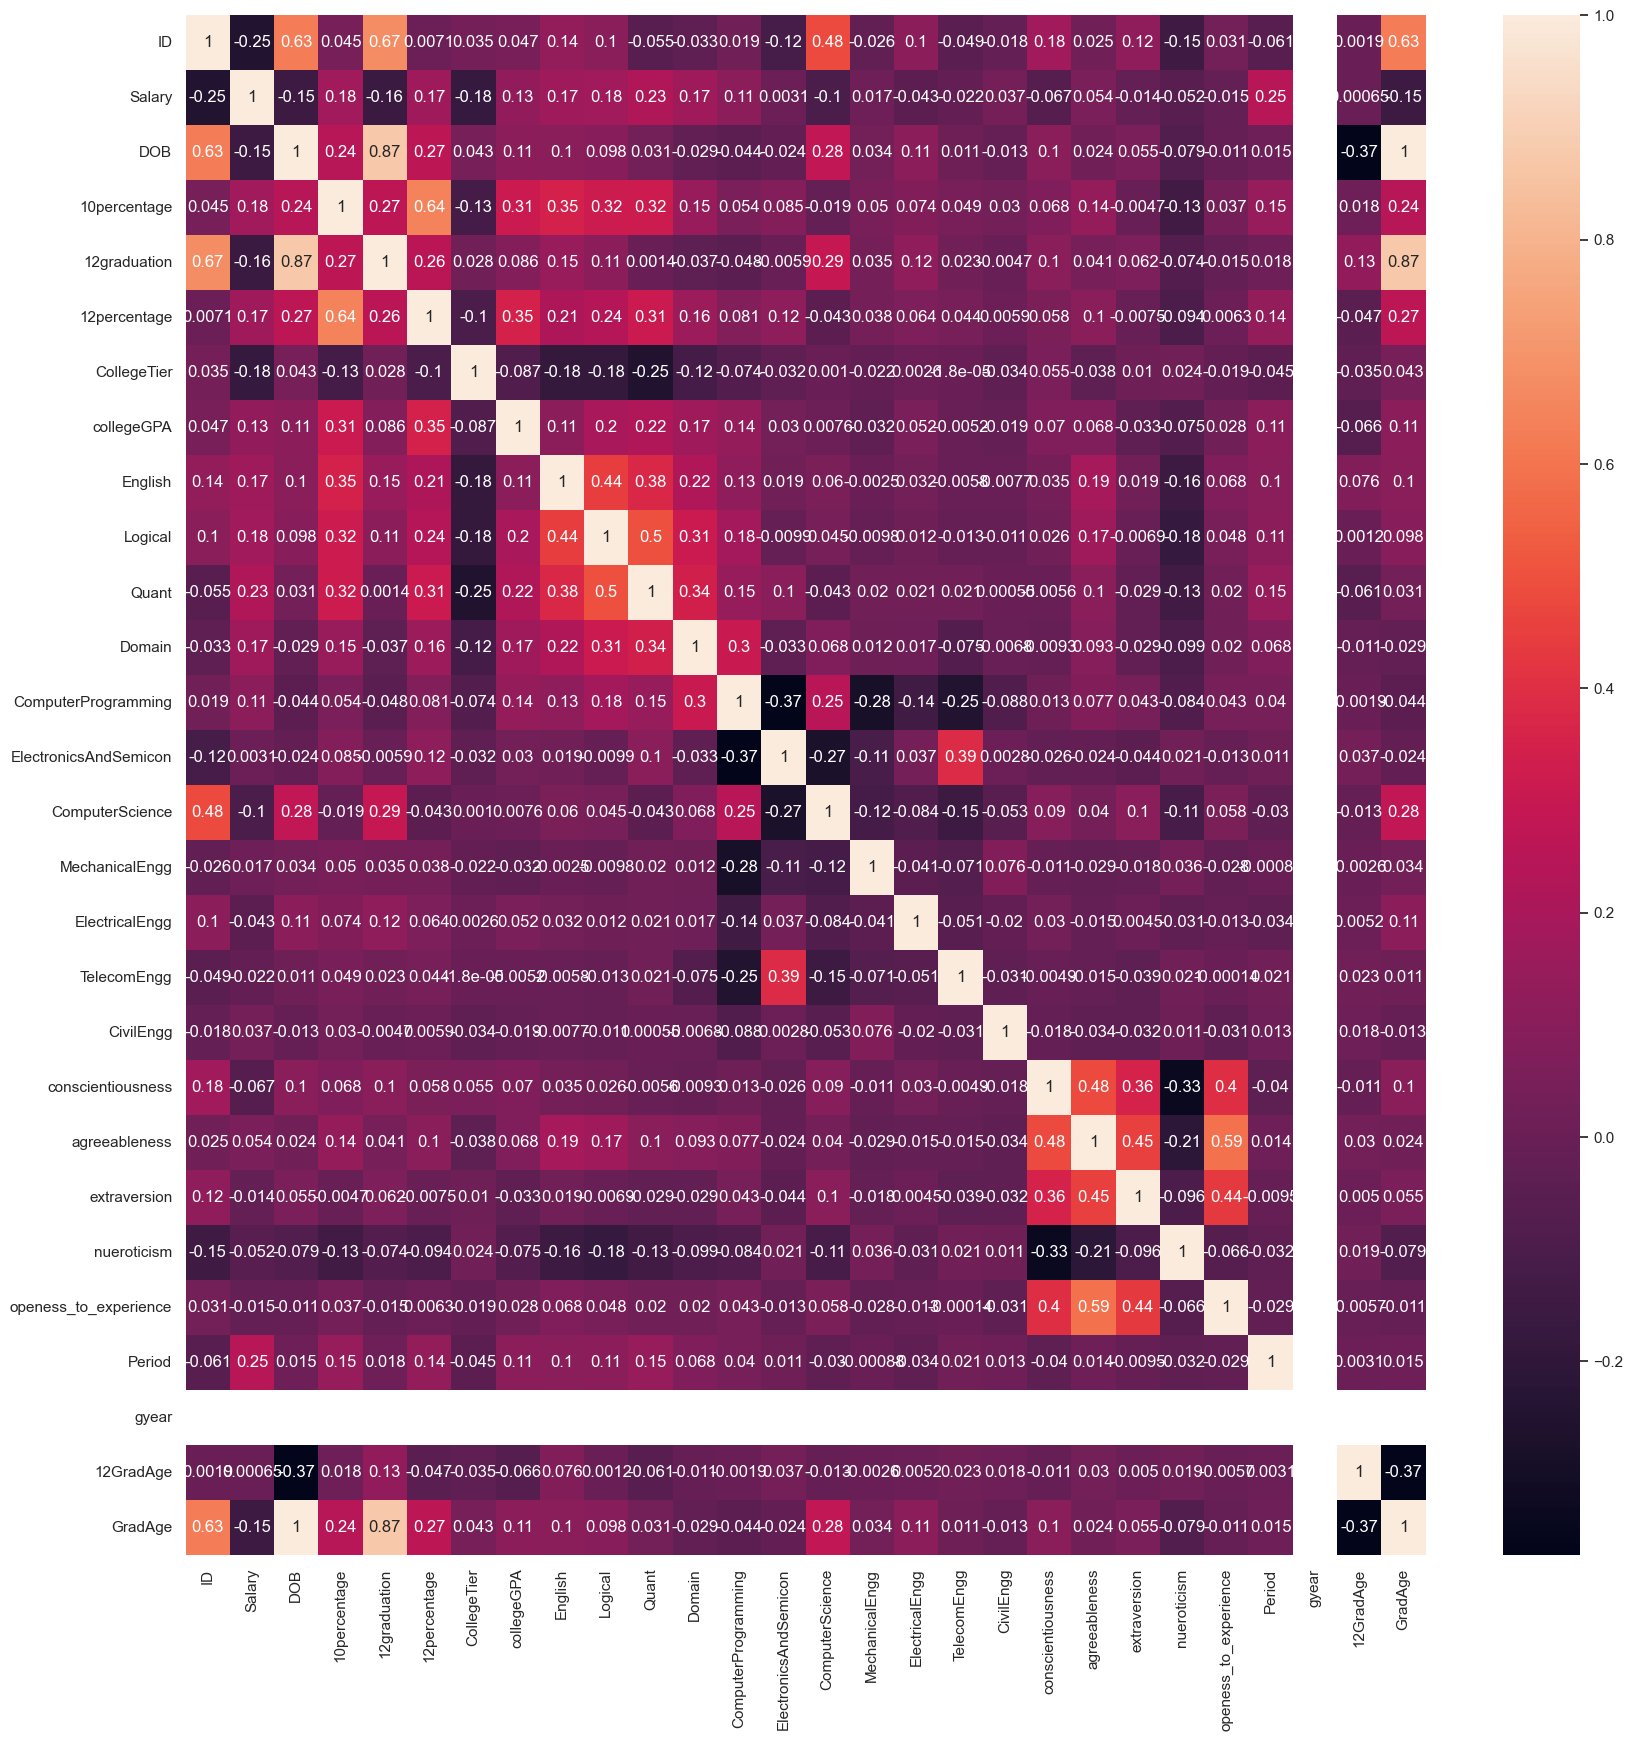

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True)

For Whole dataset
Gender
f    6.085526
m    5.723014
Name: Period, dtype: float64
********************
For High_paying jobs
Gender
f    5.341693
m    5.268662
Name: Period, dtype: float64


<Figure size 2000x500 with 0 Axes>

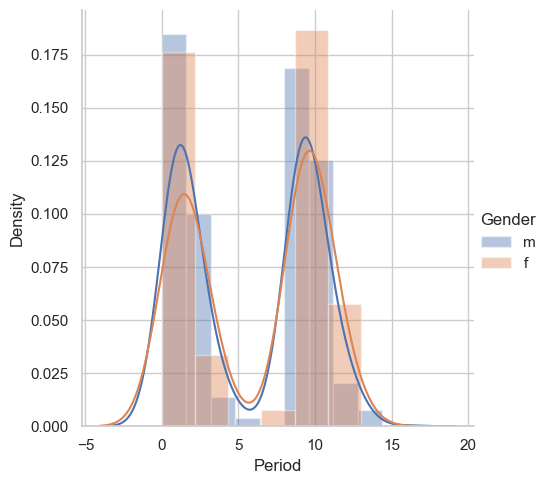

In [48]:
## Lets us check experience distribution of both male and female
plt.figure(figsize=(20,5))

sns.FacetGrid(high_pay, hue="Gender",size=5) \
   .map(sns.distplot, "Period") \
   .add_legend()
print('For Whole dataset')
print(high_pay.groupby('Gender').Period.mean())
print('*'*20)
print('For High_paying jobs')
print(dataset.groupby('Gender').Period.mean())

* It is a Bi-Modal Distribution
* Average Experience of male is around 5years and for women it is around 4 and half years.

<AxesSubplot:xlabel='Period', ylabel='Salary'>

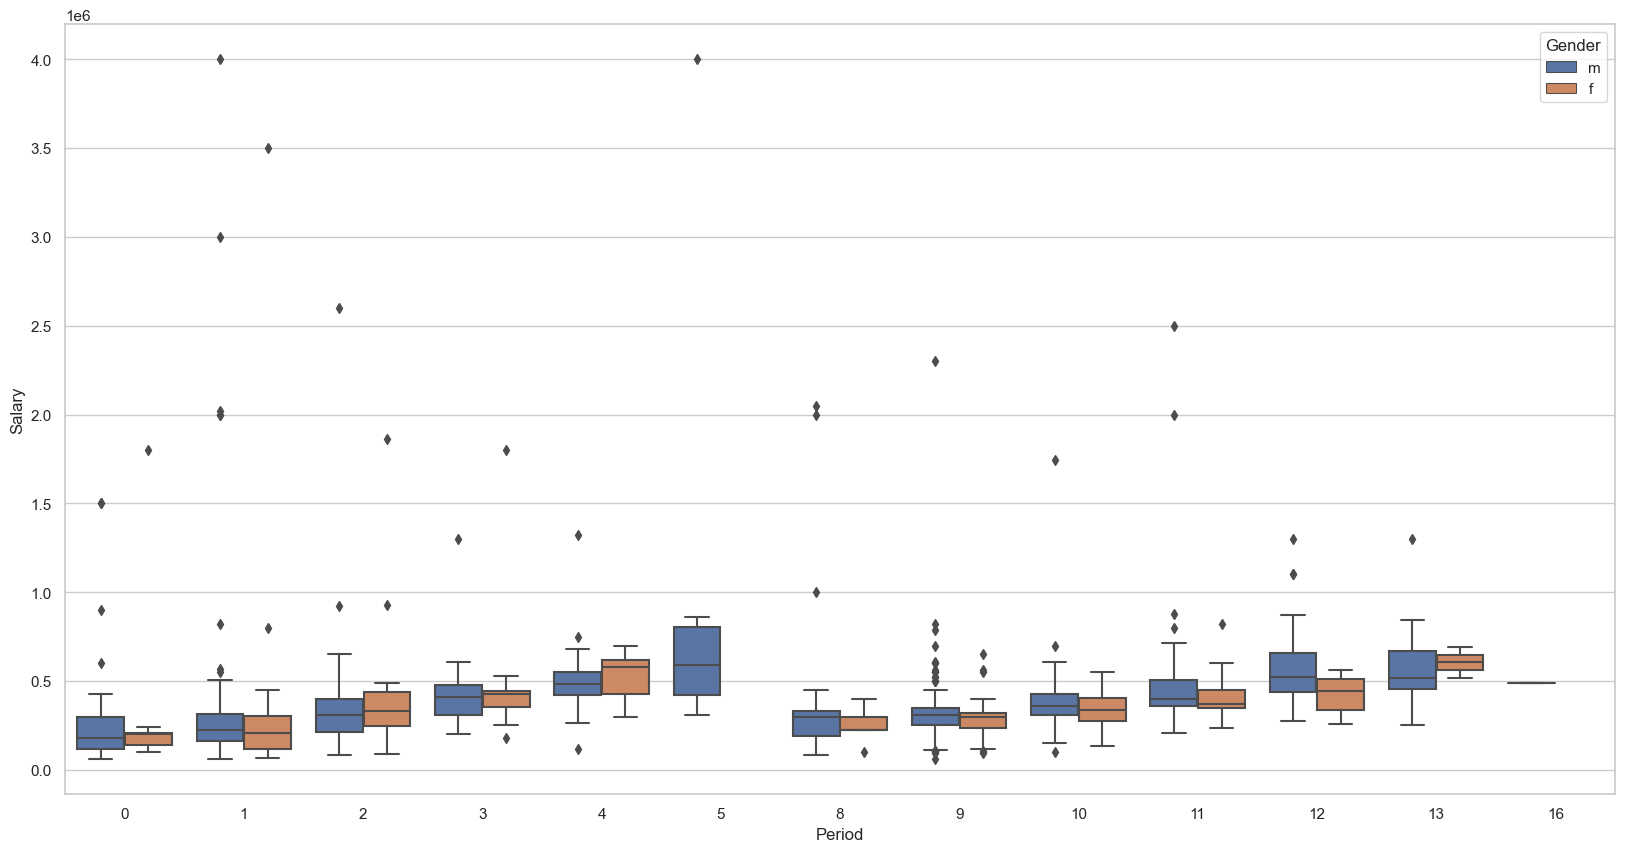

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(data=high_pay,x='Period',y='Salary',hue='Gender')

* Median salary of both males and females have increased slightly with exp for first five years
* and Decreased suddenly on the 6th year and then same pattern for the following years.
* We can see that men and women having same experience are paid nearly equally around 3.5-5 lakhs
* we need to further see the distribution of experience with respect to Designation for both men and women
* to check whether women are being paid less in a role due to experience.

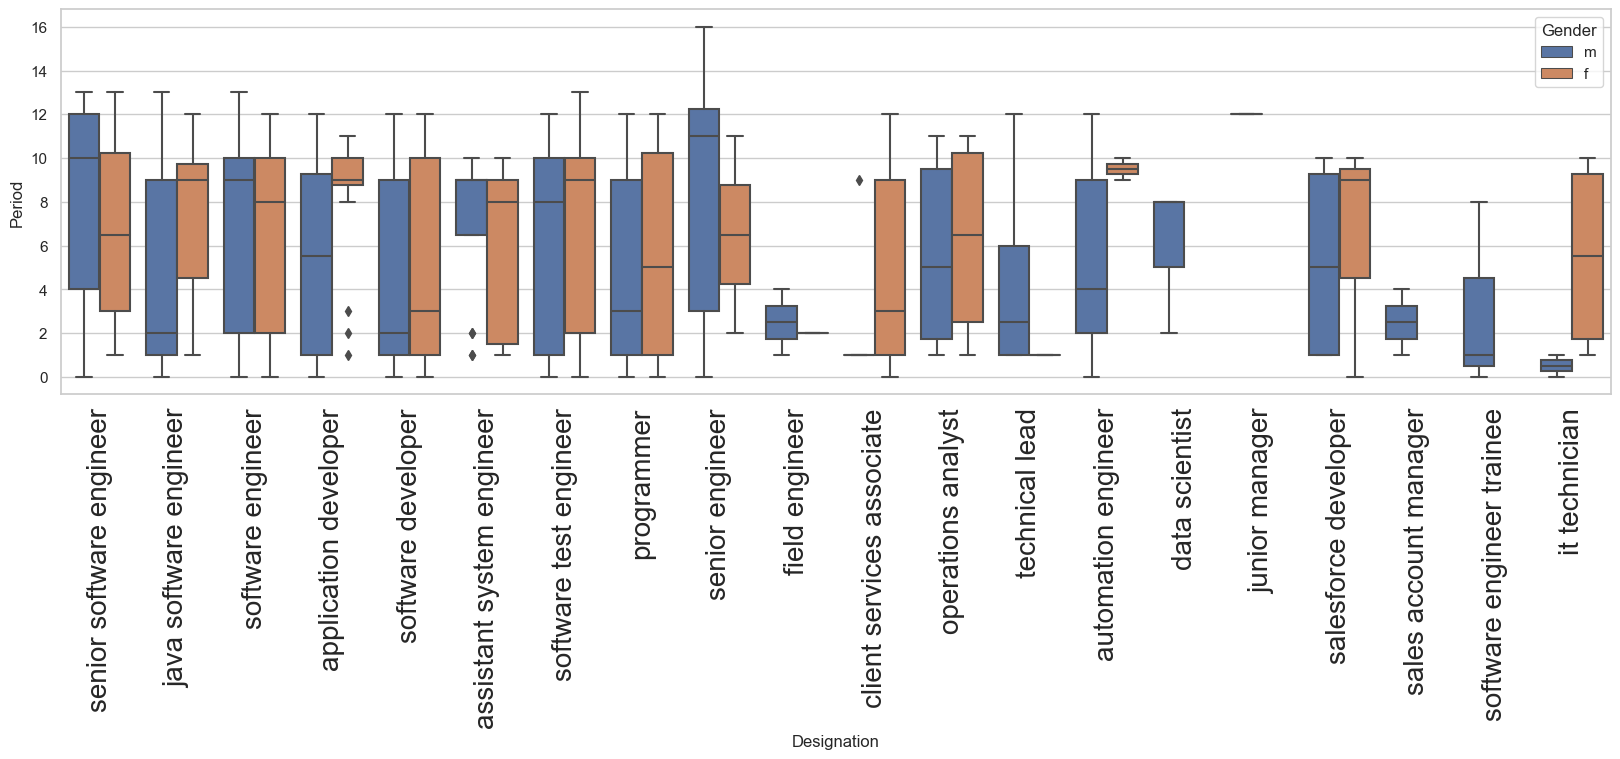

In [50]:
plt.figure(figsize=(20,5))
sns.boxplot(data=high_pay,x='Designation',y='Period',hue='Gender')
plt.xticks(fontsize=20,rotation=90)
plt.show()

* The period distribution for maximum number of Designations is skewed and this tells us every designation have people with both high and low experience
* We can see there is difference in median experience of male and female in every designation.
* But it is not a strong evidence to conclude salary difference for women is due to experience because of the fact that in some roles even women having higher experience are paid less and viceversa for men.
* Also Experience has not strong correlation with salary
* Maxium experience Designation is Senior Engineer

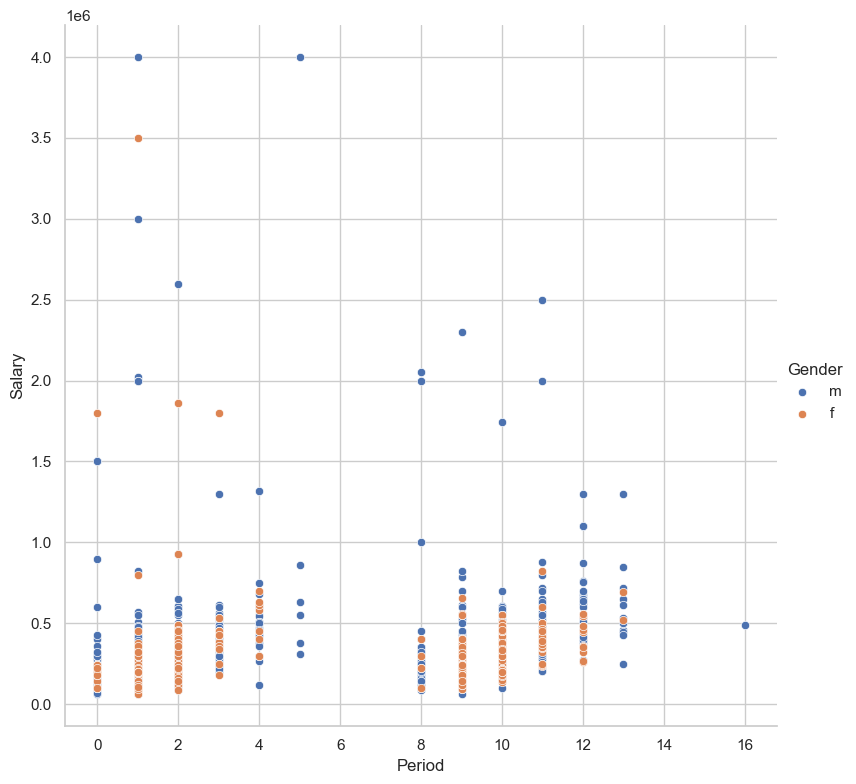

In [51]:
sns.FacetGrid(data=high_pay,hue='Gender', size=8) \
    .map(sns.scatterplot,'Period','Salary') \
    .add_legend()

* For same amount of experience,men are paid slightly higher than women in most of the cases.
* Mostly men have highly paid jobs compared with women for every level of experience.

In [52]:
## What is average experience of software engineer and software developer?
dataset[dataset.Designation.isin(['software engineer','software developer']) & dataset.Gender=='m']['Period'].mean()

nan

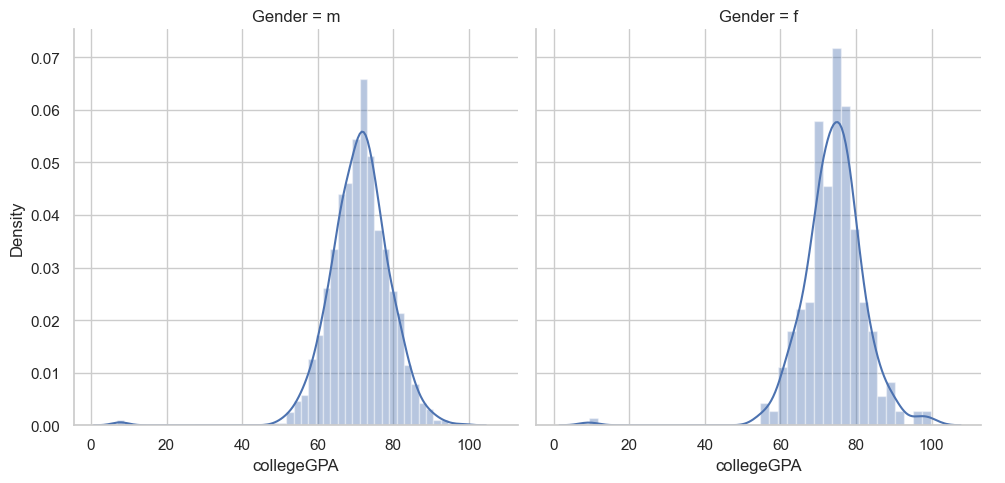

In [53]:
## Now let us check relation with collegegpa
## first check the distribution of gpa 
sns.FacetGrid(data=high_pay,col='Gender',size=5) \
    .map(sns.distplot,'collegeGPA') \
    .add_legend()


* We can see both distribution of college gpa vs male&female are normally distributed with mean around 75%.


* We can see how Similar both male and female distributions are for collegeGPA
* IQR is narrow indication most number of students have similar cgpa in 70-75% region.
* There are some students with CGPA < 20 and CGPA>90

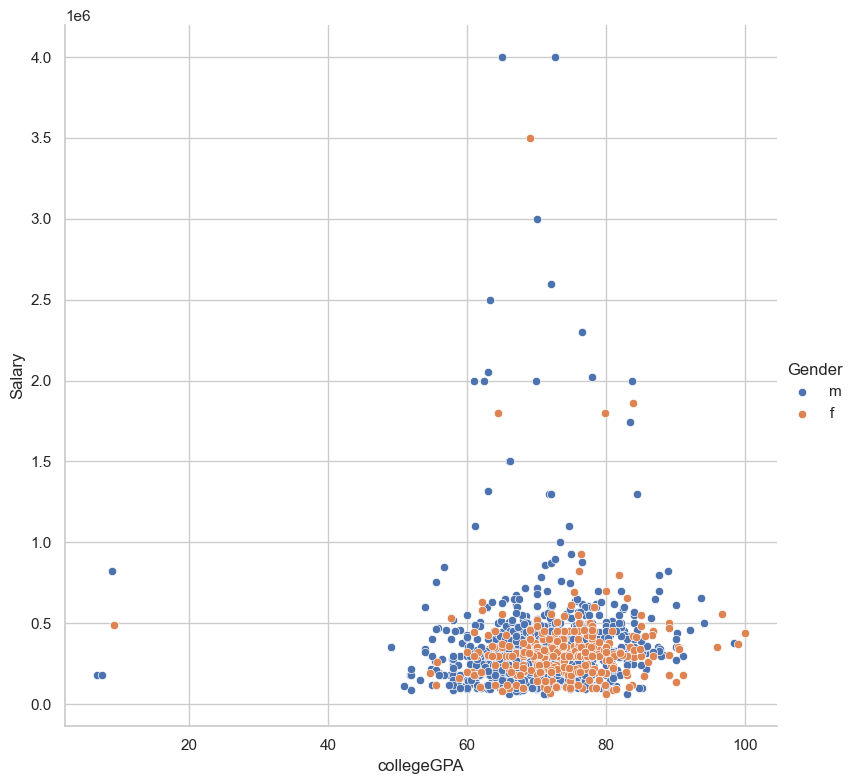

In [54]:
sns.FacetGrid(data=high_pay,hue='Gender',size=8) \
    .map(sns.scatterplot,'collegeGPA','Salary') \
    .add_legend()

* Most of men and women have cgpa around 70-75 which is a good range.
* There is no relation that having high or low gpa being men/women is effecting the salary
* so we can conclude this is not the reason for women being paid less as both distributions overlap extensively.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

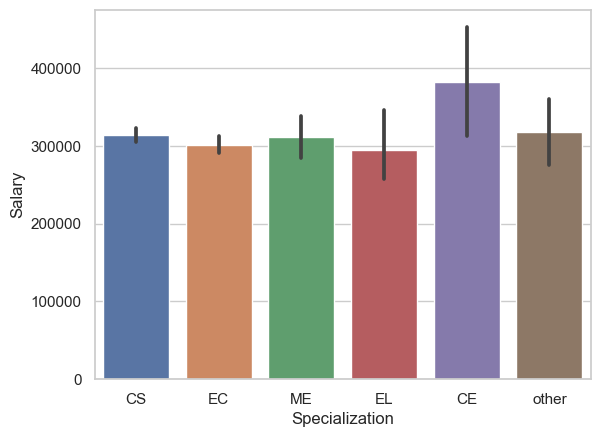

In [55]:
sns.barplot(data=dataset,x='Specialization',y='Salary')

* Aspirants from CE Branch earns the highest average pay
* All the other branches earn nearly similar average pay

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

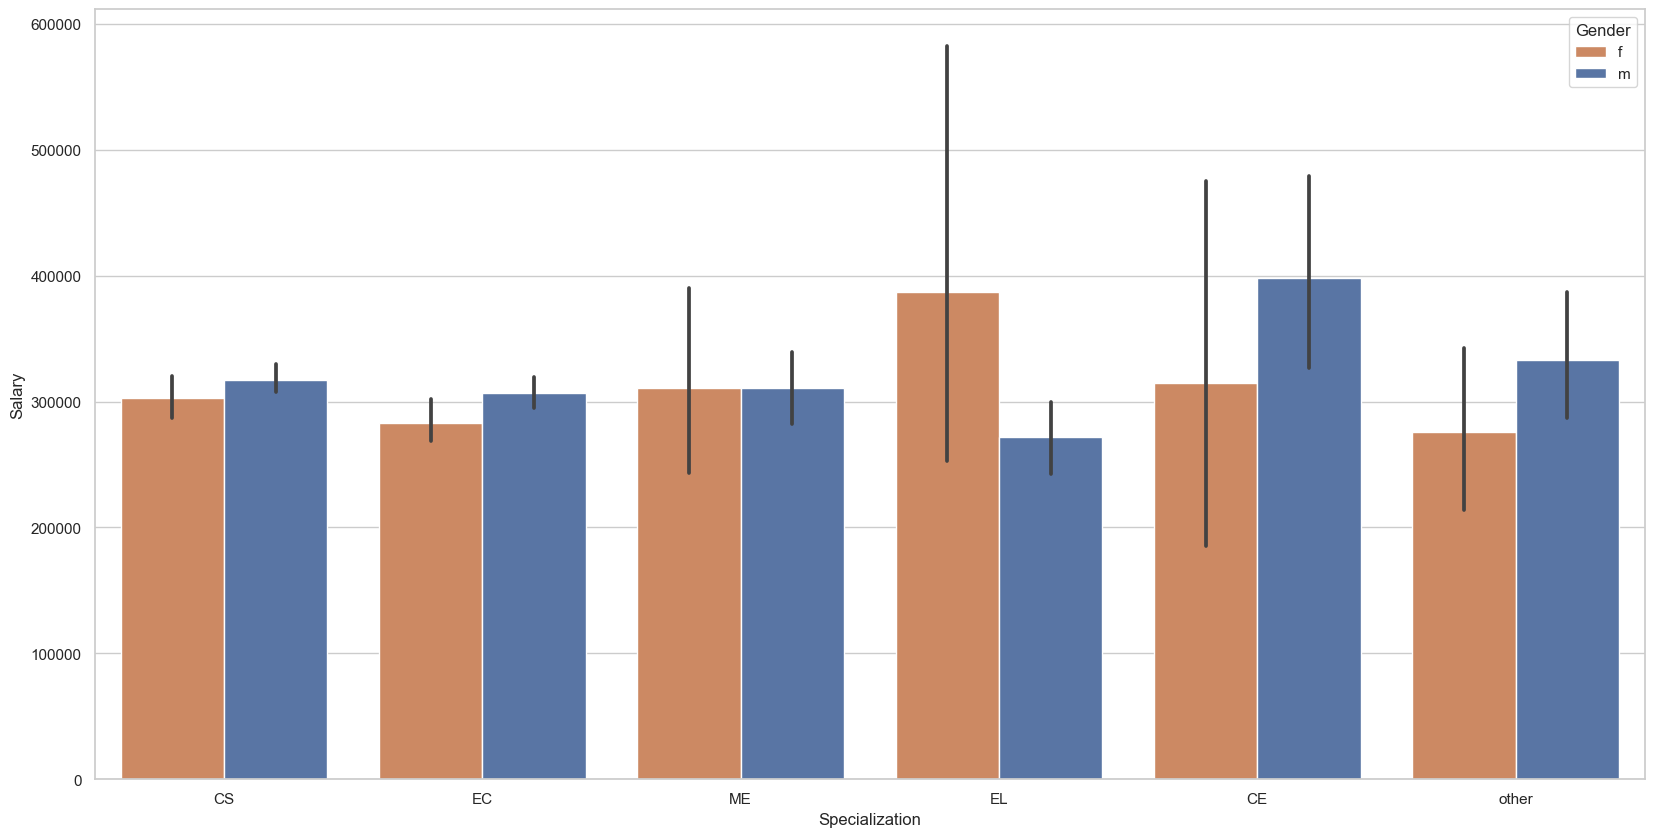

In [56]:
# For the total Dataset
## Checking whether specialization has any effect on salary
plt.figure(figsize=(20,10))
palette = [(0.8666666666666667, 0.5176470588235295, 0.3215686274509804),(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]
sns.barplot(data=dataset,x='Specialization',y='Salary',hue='Gender',palette=palette)

* Men from CS,EC,CE Earn slightly greater than women from this specialization.
* Women from the EL specialization Earns way more than men from same specialization.


<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

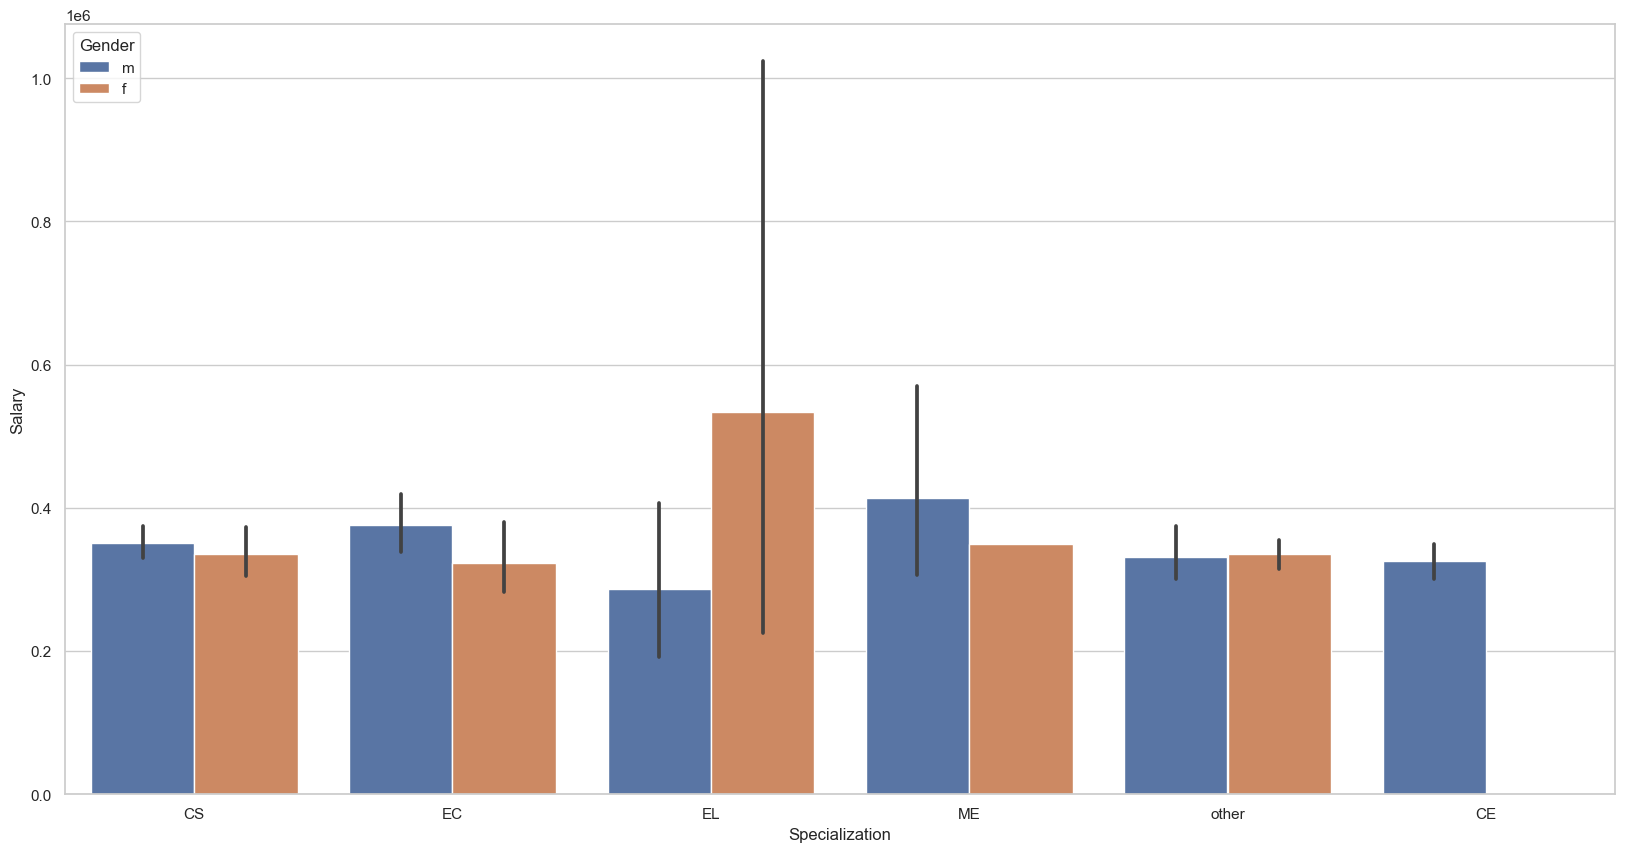

In [57]:
## For the dataset containing Highpaying Jobs
plt.figure(figsize=(20,10))
sns.barplot(data=high_pay,x='Specialization',y='Salary',hue='Gender')

* This is for the people who have higher pays
* From the CE Specialization,Only men are taking up higher pay jobs
* Mostly specialization is not the reason for women being paid less becuase as we say bulk of people are from cs and for cs men and women earn similar 

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

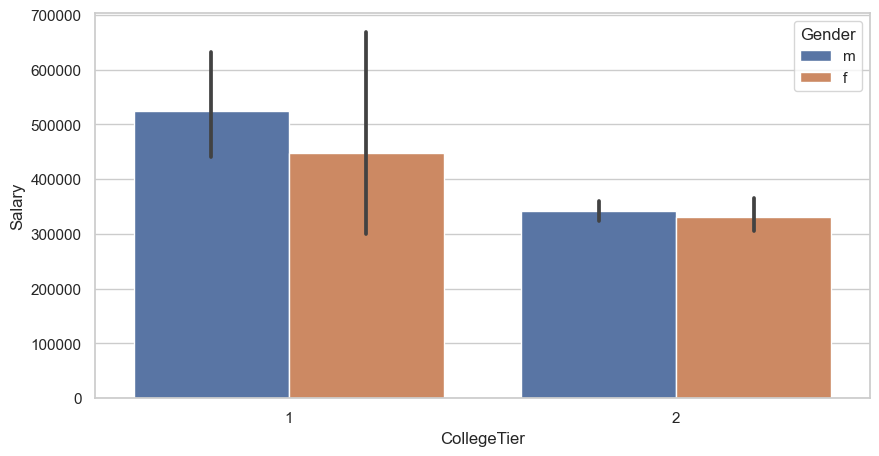

In [58]:
## Lets us check salary with the College Tier
plt.figure(figsize=(10,5))
sns.barplot(data=high_pay,x='CollegeTier',y='Salary',hue='Gender')

In [59]:
high_pay.groupby('CollegeTier').Gender.value_counts()

CollegeTier  Gender
1            m          85
             f          17
2            m         897
             f         287
Name: Gender, dtype: int64

* From the above bar graph,we can see that students from tier1 colleges have higher salary.
* We can see more men are from tier1 colleges than women and overally most students are from tier2 colleges.
* This might be a reason for women being paid less than men in high paying jobs because as most of women are from tier-2 colleges

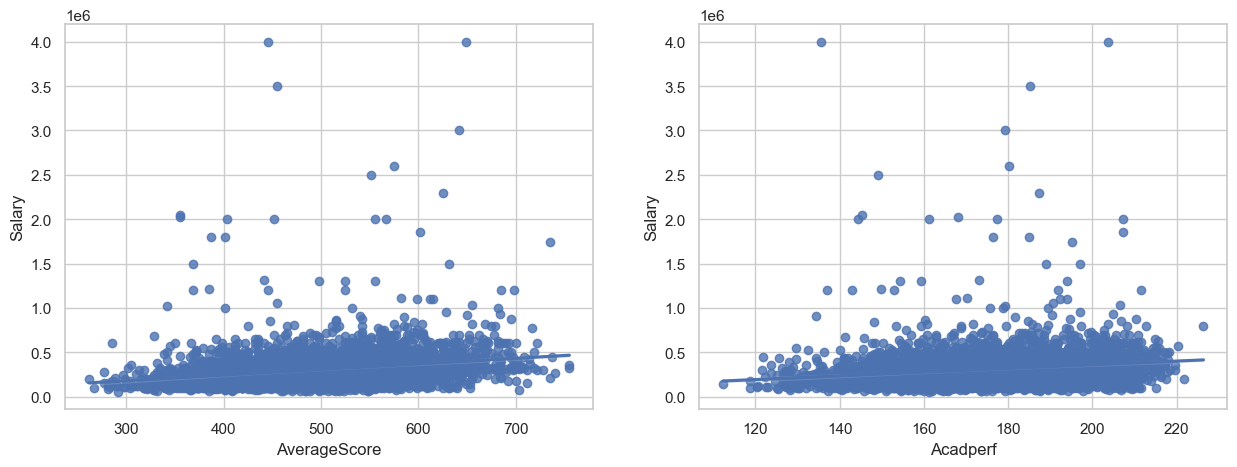

In [60]:
plt.figure(figsize=(15,5))
dataset['AverageScore']=(dataset['Logical']+dataset['Quant']+dataset['English'])/3
dataset['Acadperf']=dataset['10percentage']+dataset['12percentage']+dataset['collegeGPA']/3
plt.subplot(1,2,1)
sns.regplot(x='AverageScore',y='Salary',data=dataset)
plt.subplot(1,2,2)
sns.regplot(x='Acadperf',y='Salary',data=dataset)
plt.show()

* We can see there is some positive correlation of salary with both the Avgscore and Acadperformance.

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

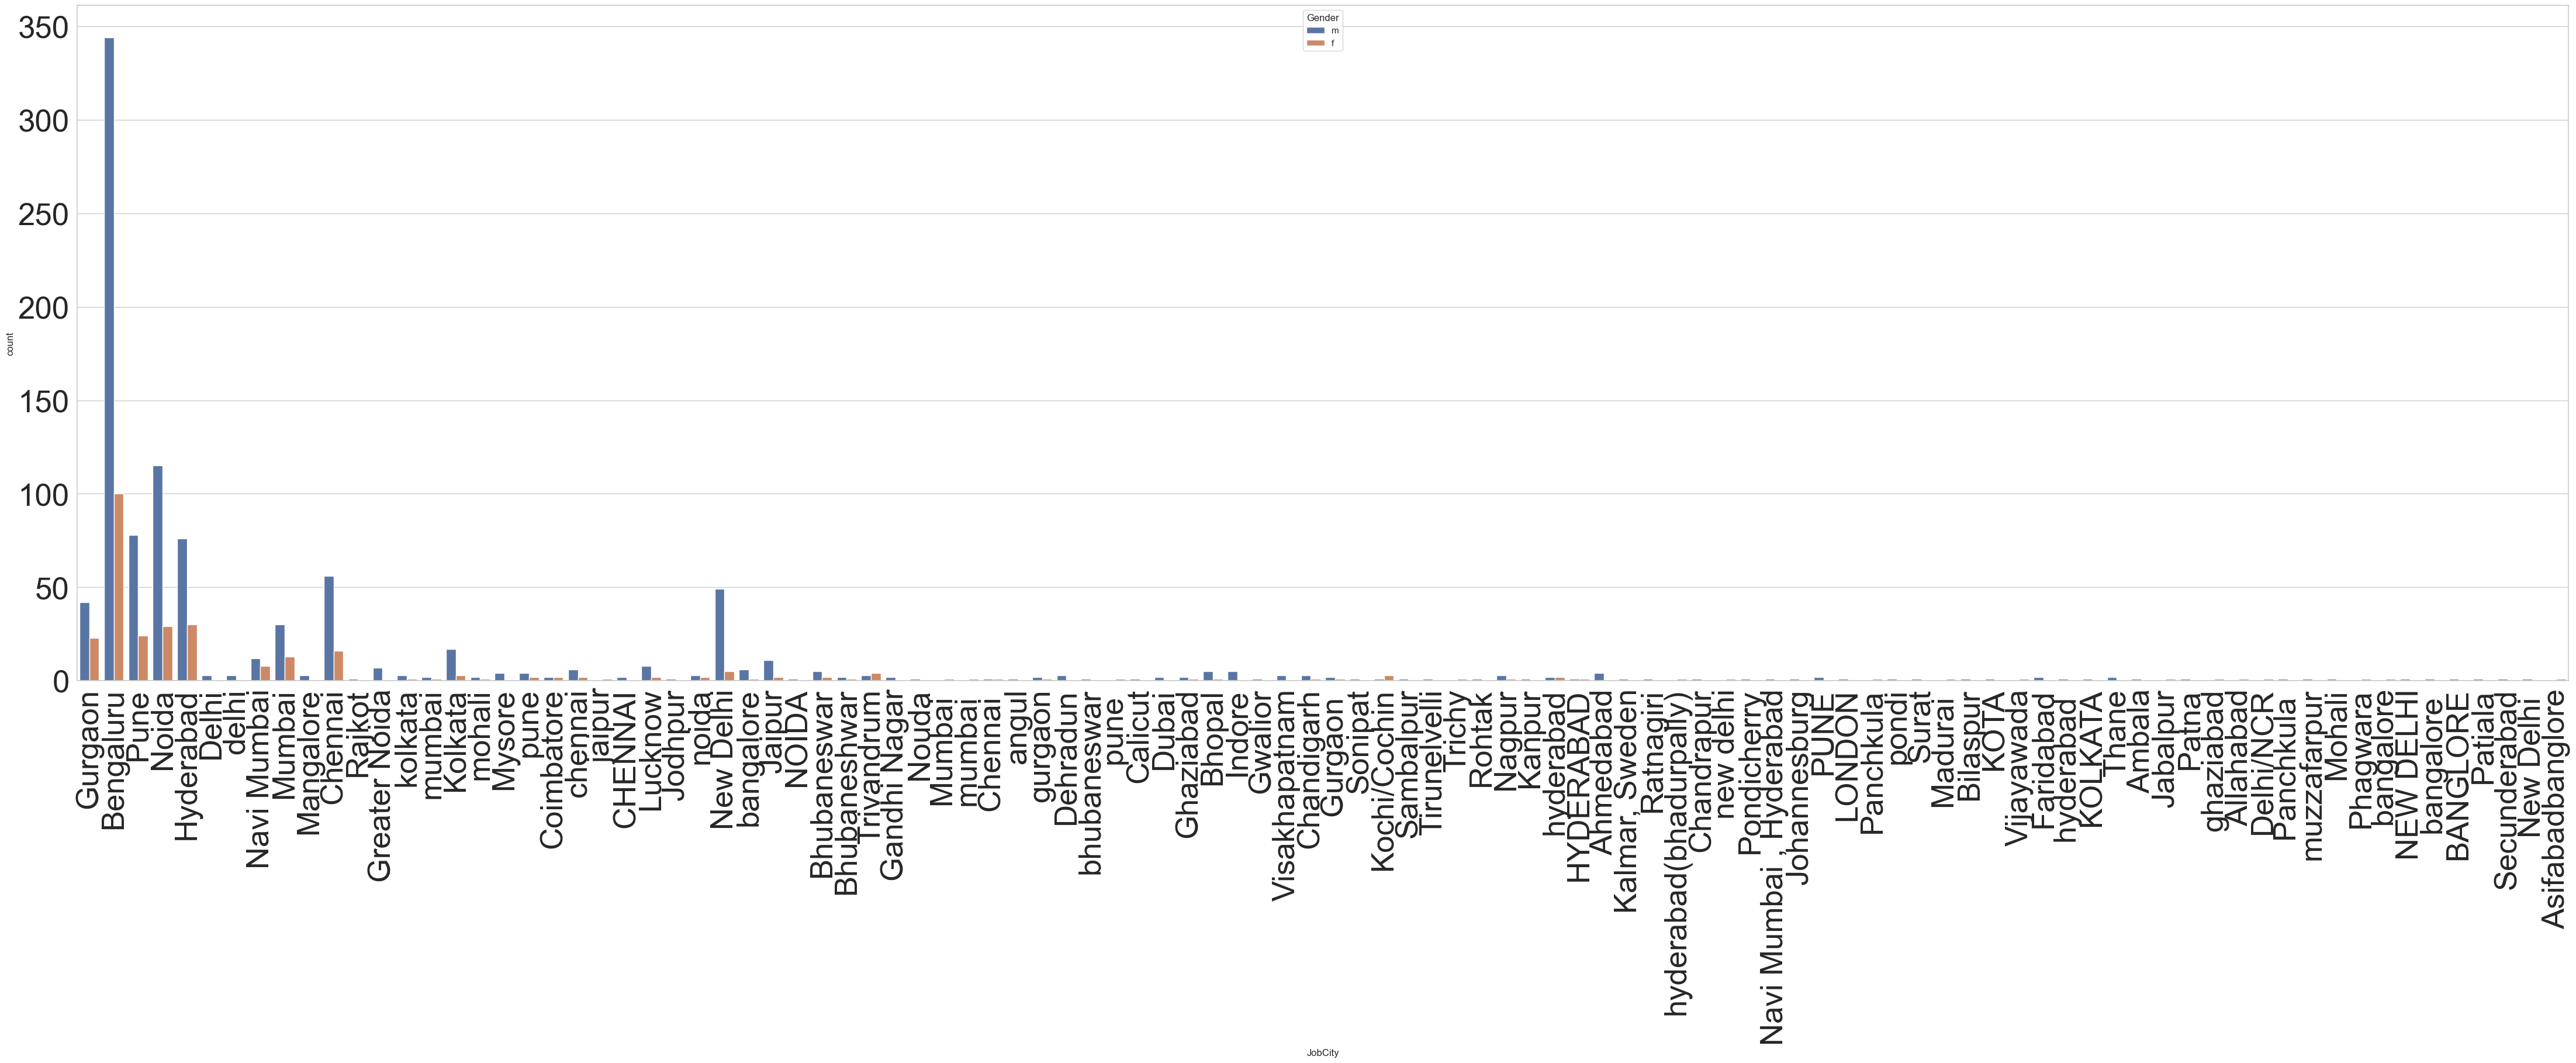

In [61]:
plt.figure(figsize=(55,15))
sns.countplot(x="JobCity",data=high_pay,hue="Gender")
plt.xticks(fontsize=38,rotation=90)
plt.yticks(fontsize=38)

* Most amcat aspirants work in bengaluru,Noida,hyderabad and pune.
* It is because most of them are from IT domain so majority of them work in these cities

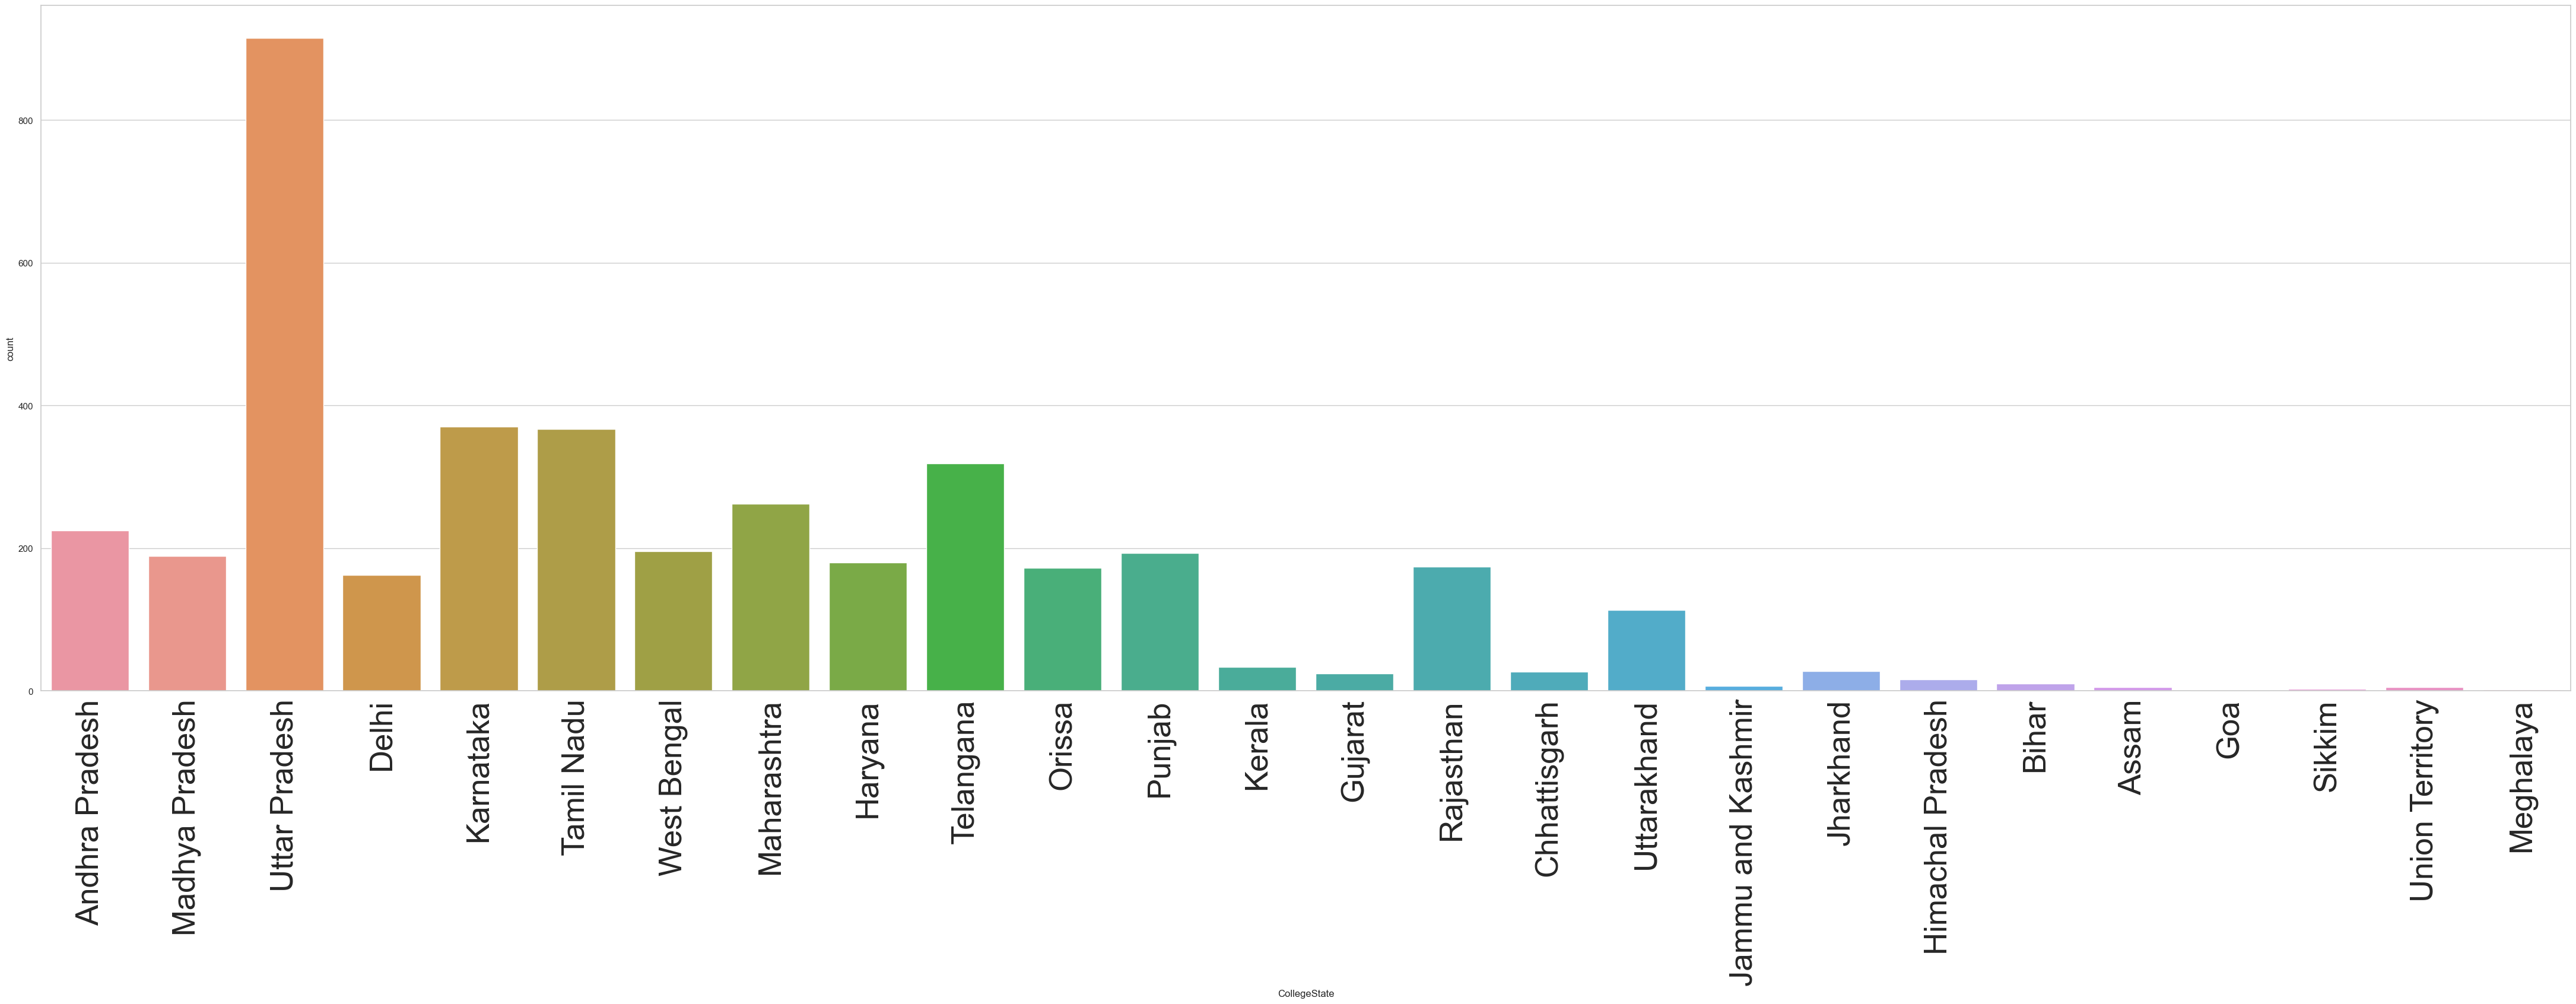

In [62]:
plt.figure(figsize=(55,15))
sns.countplot(data=dataset,x='CollegeState')
plt.xticks(fontsize=38,rotation=90)
plt.show()

## Overall Conclusions :-

- **Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.** 

- **Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.**

- **Software Engineer and Software Developer are the most aimed profession for amcat aspirants.**

## Let us verify claims by Testing the Hypothesis

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

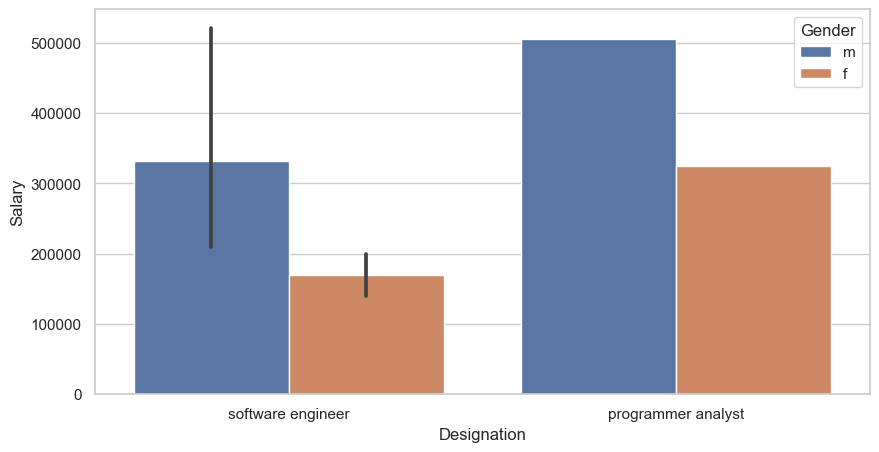

In [63]:
new=dataset[(dataset["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (dataset["Period"]==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new)


* For Freshers,the salary is starting from 200k and male are earing more than female as a fresher.

## 1 sample T-test to verify the claim

* Null Hypothesis:  mu = 250k
* Alternate Hypothesis : mu != 250k

In [64]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv = st.ttest_1samp(new['Salary'],popmean=250000)[1]
### for a 95% confidence interval,my p- value should be >0.05 to claim the null hypothesis
if pv < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 250k')
else:
    print('We fail to reject null hypothesis and Avergae salary is equal to 250k')


We fail to reject null hypothesis and Avergae salary is equal to 250k


<AxesSubplot:xlabel='Specialization', ylabel='count'>

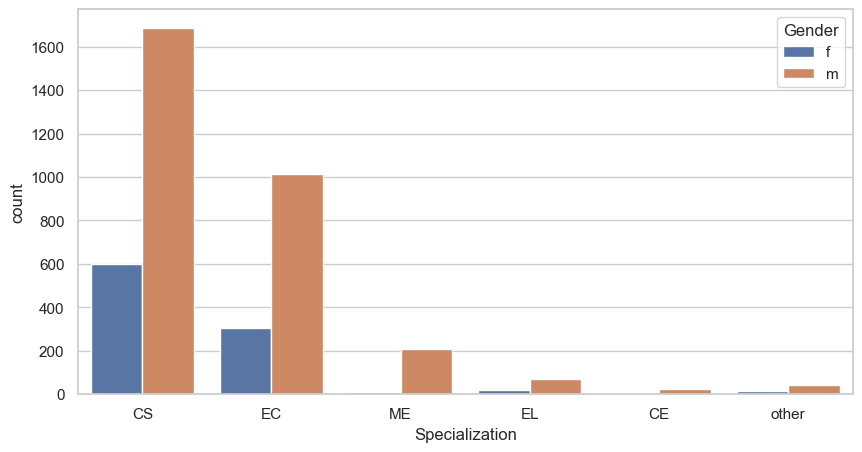

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='Specialization',hue='Gender')

* Most of the Amcat Aspirants are from CS&EC specialization.
## Chi-Square Test to check the relation between Specialization and Gender.

* Null Hypothesis:  Gender does not impact specialization
* Alternate Hypothesis : Gender impacts specialization

In [66]:
sample_columns = pd.crosstab(dataset['Gender'],dataset['Specialization'],margins=True)
pv = cst(sample_columns)[1]
if pv < 0.05:
    print('We reject the null hypothesis and Gender impacts specialization')
else:
    print('We fail to reject null hypothesis and Gender does not impact specialization')

We reject the null hypothesis and Gender impacts specialization


## So,The above made claims are True!
### The preference of Specialisation depends upon the Gender

                                  - - - - - - - - X X X X X X X X - - - - - - - -